<a href="https://colab.research.google.com/github/deep-learning-indaba/indaba-pracs-2025/blob/main/Part_2_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 2: Classification



Image here

<a href="https://colab.research.google.com/github/deep-learning-indaba/indaba-pracs-2024/blob/main/practicals/Intro_to_ML_using_JAX/Introduction_to_ML_using_JAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

© Deep Learning Indaba 2025. Apache License 2.0.

**Authors:** Tinuade Adeleke

**Reviewers:**

**Introduction:**
In machine learning, classification is a fundamental supervised learning task where the goal is to assign a label or category to an input based on learned patterns from a labeled dataset. For instance, a model may learn to classify emails as "spam" or "not spam" based on features like subject line, word usage, and sender address. Classification problems can be binary (two classes) or multiclass (more than two categories), and they are central to many real-world applications such as disease diagnosis, image recognition, fraud detection, and sentiment analysis. The learning algorithm is trained on a dataset where each example is paired with a correct label, and the objective is to learn a decision boundary or rule that generalizes well to unseen data. Logistic regression, decision trees, support vector machines, and neural networks are some of the common machine learning algorithms used for classification tasks.

In this tutorial, we explore how logistic regression and neural networks can be used to solve classification problems. We'll start by understanding the core ideas behind classification and implementing a simple logistic regression classifier from scratch. We'll look at logistic regression for non linear datasets. Finally, we’ll build a binary classifier using a multilayer perceptron (MLP) in JAX, and then extend it to handle multiclass classification.


**Topics:**

Content: <font color='green'>`Classification`</font> , <font color='orange'>`Supervised Learning`</font>  
Level: <font color='grey'>`Beginner`</font>


**Aims/Learning Objectives:**

By the end of this tutorial, you will be able to:

- Understand the fundamental concepts and goals of classification in machine learning.

- Grasp the intuition behind logistic regression and how it connects to other classification algorithms.

- Implement multilayer perceptrons (MLPs) for classification tasks using JAX.

- Train MLPs effectively and evaluate their performance on real-world data.

**Prerequisites:**

- Practical 1
  - Regression
  - Basic knowledge of Jax

**Outline:**

>[Part 1 - Logistic regression](#scrollTo=8Ewv4SrHFlQk)

>>[Limitations of linear regression](#scrollTo=68t383ohGJr2)

>>[Sigmoid function](#scrollTo=61Dp91ogni5w)

>>[Loss landscape visualisation](#scrollTo=IIn9Cak2Gcq7)

>>[Cross Entropy Loss function derivation](#scrollTo=s5esOI7qpZQ9)

>>[Non linear models](#scrollTo=YlCwAggVgXZU)

>[Part 2 - Build a simple binary classifier with JAX](#scrollTo=HnPYinQxGujS)

>>[Define a Multi layer perceptron ](#scrollTo=vYdRBTYUb6dt)

>>[Write training loop](#scrollTo=Nq5R2c3mJMSa)

>>>[Define loss function](#scrollTo=0n3jH8LpJIrd)

>>>[Define Train step](#scrollTo=0n3jH8LpJIrd)

>>>[Define Eval step](#scrollTo=0n3jH8LpJIrd)


>[Part 3 - Extend binary classifier to a Multi-class classifier](#scrollTo=aB0503xgmSFh)

>> [Introduce MNIST dataset](#scrollTo=XrWSN-zaWAhJ)

>>[Motivate softmax activation function](#scrollTo=XrWSN-zaWAhJ)

>>[Motivate multi class cross entropy loss function](#scrollTo=AcyM6XRj1cDz)

>>[Modify binary classifier](#scrollTo=hNJgESq_LP4R)

>>>[Modify MLP](#scrollTo=q9dQh9DdLYPE)

>>>[Modify loss function](#scrollTo=q9dQh9DdLYPE)

> [Part 4 - Training techniques](#scrollTo=BKtMEnRkhAg9)

>>[Regularisation](#scrollTo=fkpytbBzMvMj)

>>[Learning rate decay](#scrollTo=XStsgHB2MarI)

>> [Normalisation](#scrollTo=3Wrxt2orM7sk)

>[Conclusion](#scrollTo=fV3YG7QOZD-B)

>[Appendix:](#scrollTo=XrRoSqlxfi7f)

>>[Derivation of partial derivatives for exercise 2.4.](#scrollTo=9OH9H7ndfuyQ)

**Note:** To get the most out of this tutorial, try answering the questions, quizzes, and code tasks on your own before checking the solutions. Actively working through them is the most effective way to learn.

**Before you start:**

Run the "Installation and Imports" cell below.

### Installation and Imports

In [1]:
!pip install -U flax
!pip install -U optax
!pip install -q clu

import numpy as np
import random
import matplotlib.pyplot as plt
from flax import nnx
import jax
import jax.numpy as jnp
import pandas as pd
import copy
import math
from matplotlib import cm
import tensorflow as tf
import optax

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.9/455.9 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 MB 9.7 MB/s eta 0:00:00
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.5.3
    Uninstalling jaxlib-0.5.3:
      Successfully uninstalled jaxlib-0.5.3
  Attempting uninstall: jax
    Found existing installation: jax 0.5.3
    Uninstalling jax-0.5.3:
      Successfully uninstalled jax-0.5.3
  Attempting uninstall: flax
    Found existing installation: flax 0.10.6
    Uninstalling flax-0.10.6:
      Successfully uninstalled flax-0.10.6
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 6.8 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/jaxlib/plugin_support.py:71: RuntimeWarning: JAX plugin jax_cuda12_plugin version 0.5.3 is installed, but it is not compatible with the installed jaxlib version 0.7.0, so it will not be used.
  warnings.warn(


#### Helper functions (Run Cell)

In [2]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))

In [3]:
def log_1pexp(x, maximum=20):
    ''' approximate log(1+exp^x)
        https://stats.stackexchange.com/questions/475589/numerical-computation-of-cross-entropy-in-practice
    Args:
    x   : (ndarray Shape (n,1) or (n,)  input
    out : (ndarray Shape matches x      output ~= np.log(1+exp(x))
    '''

    out  = np.zeros_like(x,dtype=float)
    i    = x <= maximum
    ni   = np.logical_not(i)

    out[i]  = np.log(1 + np.exp(x[i]))
    out[ni] = x[ni]
    return out


In [4]:
def compute_cost_matrix(X, y, w, b, logistic=False, lambda_=0, safe=True):
    m = X.shape[0]
    y = y.reshape(-1,1)             # ensure 2D
    w = w.reshape(-1,1)             # ensure 2D
    if logistic:
        if safe:  #safe from overflow
            z = X @ w + b                                                           #(m,n)(n,1)=(m,1)
            cost = -(y * z) + log_1pexp(z)
            cost = np.sum(cost)/m                                                   # (scalar)
        else:
            f    = sigmoid(X @ w + b)                                               # (m,n)(n,1) = (m,1)
            cost = (1/m)*(np.dot(-y.T, np.log(f)) - np.dot((1-y).T, np.log(1-f)))   # (1,m)(m,1) = (1,1)
            cost = cost[0,0]                                                        # scalar
    else:
        f    = X @ w + b                                                        # (m,n)(n,1) = (m,1)
        cost = (1/(2*m)) * np.sum((f - y)**2)                                   # scalar

    reg_cost = (lambda_/(2*m)) * np.sum(w**2)                                   # scalar

    total_cost = cost + reg_cost                                                # scalar

    return total_cost                                                           # scalar


In [19]:
def compute_gradient(x, y, y_hat, w, b):
    m = x.shape[0]

    err   = y_hat - y                                              # (m,1)
    dj_dw = (1/m) * (x.T @ err)                                   # (n,m)(m,1) = (n,1)
    dj_db = (1/m) * np.sum(err)                                   # scalar

    return dj_db, dj_dw                                           # scalar, (n,1)

In [14]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters, logistic=False, lambda_=0, verbose=True):

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    w = w.reshape(-1,1)      #prep for matrix operations
    y = y.reshape(-1,1)

    for i in range(num_iters):

        if logistic:
            f_wb  = sigmoid( X @ w + b )
        else:
            f_wb  = X @ w + b

        # f_wb  = sigmoid( X @ w + b ) if logistic else  X @ w + b

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = compute_gradient(X, y, f_wb, w, b)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( compute_cost_matrix(X, y, w, b, logistic, lambda_) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            if verbose: print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
    return w.reshape(w_in.shape), b
    # return w.reshape(w_in.shape), b, J_history  #return final w,b and J history for graphing

In [42]:
'''
Let's plot our dataset with the different classes highlighted in different colors
'''
def plot_data(x, y, w=np.zeros((1)), b=0.0, thresh=None, logistic=False):
  plt.scatter(x, y, c=y, cmap="rainbow")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.title("Dataset")

  if w.item() != 0:
    x_line = np.linspace(min(x), max(x), 100)
    if logistic:
      print('using logistic regression')

      y_line = sigmoid(np.matmul(x_line.reshape(-1,1), w.reshape(-1,1)) + b)
    else:
      y_line = np.matmul(x_line.reshape(-1,1), w.reshape(-1,1)) + b

    plt.plot(x_line, y_line, color="green", label=r"$f_{w,b}(x) = wx + b$")

    if thresh is not None:
      if len(thresh) == 1:
        plt.axhline(y=thresh[0], color="black", linestyle="--", label=f"Threshold = {thresh[0]}")
      elif len(thresh) == 2:
        plt.axhline(y=thresh[1], color="purple", linestyle="--", label=f"Threshold = {thresh[1]}")
        plt.axvline(x=thresh[0], color="black", linestyle="--", label=f"Threshold = {thresh[0]}")
  plt.grid(True)
  plt.show()

In [8]:
def compute_cost_logistic_sq_err(X, y, w, b):
    """
    compute sq error cost on logicist data (for negative example only, not used in practice)
    Args:
      X (ndarray): Shape (m,n) matrix of examples with multiple features
      w (ndarray): Shape (n)   parameters for prediction
      b (scalar):              parameter  for prediction
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)                 #add sigmoid to normal sq error cost for linear regression
        cost = cost + (f_wb_i - y[i])**2
    cost = cost / (2 * m)
    return np.squeeze(cost)

In [9]:
def plt_logistic_squared_error(X, y, cost_function):
    """ plots logistic squared error for demonstration """
    wx, by = np.meshgrid(np.linspace(-6,12,50),
                         np.linspace(10, -20, 40))
    points = np.c_[wx.ravel(), by.ravel()]
    cost = np.zeros(points.shape[0])

    for i in range(points.shape[0]):
        w,b = points[i]
        cost[i] = cost_function(X.reshape(-1,1), y, w, b)
    cost = cost.reshape(wx.shape)

    fig = plt.figure()
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(wx, by, cost, alpha=0.6,cmap=cm.jet,)

    ax.set_xlabel('w', fontsize=16)
    ax.set_ylabel('b', fontsize=16)
    ax.set_zlabel("Cost", rotation=90, fontsize=16)
    ax.set_title('"Logistic" Squared Error Cost vs (w, b)')
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

In [10]:
def plt_logistic_cost(X, y, cost_function):
    """ plots logistic cost """
    wx, by = np.meshgrid(np.linspace(-6,12,50),
                         np.linspace(0, -20, 40))
    points = np.c_[wx.ravel(), by.ravel()]
    cost = np.zeros(points.shape[0],dtype=np.longdouble)

    for i in range(points.shape[0]):
        w,b = points[i]
        cost[i] = cost_function(X.reshape(-1,1), y, w, b, logistic=True, safe=True)
    cost = cost.reshape(wx.shape)

    fig = plt.figure(figsize=(9,5))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(wx, by, cost, alpha=0.6,cmap=cm.jet,)

    ax.set_xlabel('w', fontsize=16)
    ax.set_ylabel('b', fontsize=16)
    ax.set_zlabel("Cost", rotation=90, fontsize=16)
    ax.set_title('Logistic Cost vs (w, b)')
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    ax = fig.add_subplot(1, 2, 2, projection='3d')

    ax.plot_surface(wx, by, np.log(cost), alpha=0.6,cmap=cm.jet,)

    ax.set_xlabel('w', fontsize=16)
    ax.set_ylabel('b', fontsize=16)
    ax.set_zlabel('\nlog(Cost)', fontsize=16)
    ax.set_title('log(Logistic Cost) vs (w, b)')
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    plt.show()
    return cost

In [11]:
def reset_matplotlib():
    %matplotlib inline
    plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
    plt.rcParams['image.interpolation'] = 'nearest'
    plt.rcParams['image.cmap'] = 'gray'

reset_matplotlib()

## Logistic Regression

In this section we would build the intuition for logistic regression and build a logistic regression classifier from scratch. Some helper functions for plotting and other things have been provided below so you should just run the cells.

#### Limitations of Linear regression


In the previous tutorial, we used non linear regression to solve a numerical prediction task and saw how effective it can be in that context. However, as mentioned in the introduction, many real-world machine learning problems involve classification, where the goal is to assign a discrete label or category to an input.

This naturally raises the question: **Can linear regression be used for classification tasks?** That’s what we’ll explore in this section. If it works, why does it work? If it doesn’t, what are the limitations?

To investigate, we’ll apply linear regression to a simple classification problem. We’ll use a dataset where each record contains the number of hours a student studied and whether they passed (1) or failed (0) an exam. The aim is to train a model that can predict whether a student will pass based on the number of hours studied. We’ll intentionally keep the dataset small so that we can observe, manipulate, and reason about the model’s behavior in a controlled setting.

<details>
<summary>🔬 Note</summary>
This kind of hands on, iterative exploration posing questions, designing simple experiments, observing outcomes, and refining your understanding is exactly how scientists and researchers approach new problems. It’s not just about finding the right answer, but about learning why an approach works or doesn’t work, and using that insight to guide better solutions.
</details>

Run the cell below to visualize the dataset we would work with

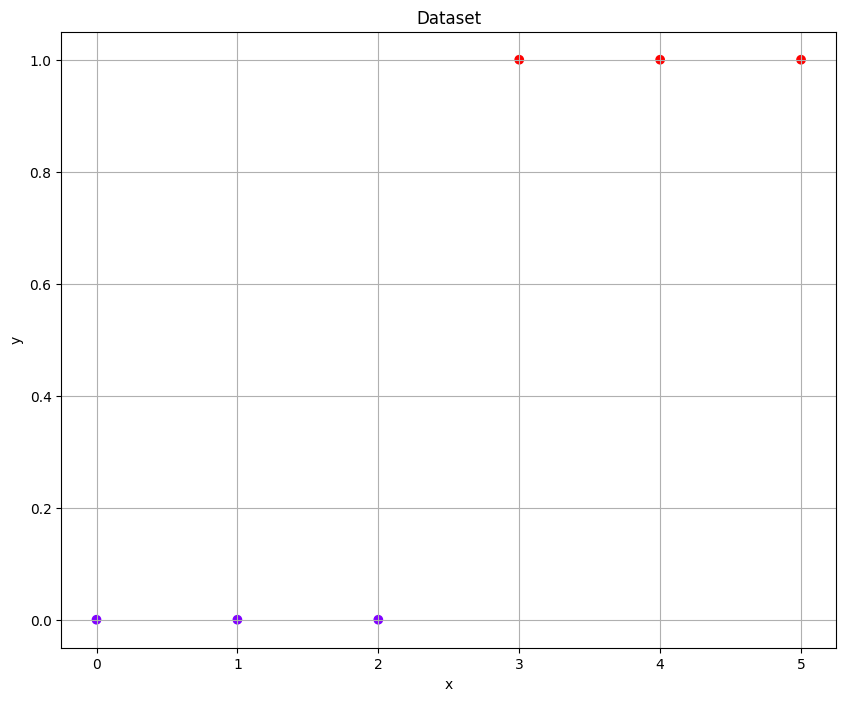

In [12]:
hours = np.array([0, 1, 2, 3, 4, 5])
passed = np.array([0, 0, 0, 1, 1, 1])
plot_data(hours, passed)

❓**Question**: Given the objective function used in linear regression, what kind of decision boundary do you expect the model to learn for predicting whether a student passes or fails based on hours studied?

<details>
<summary>✅ Answer</summary>
Linear regression tries to minimize the squared error between the predicted value and the true value using the objective function:

$$
\
L(\mathbf{w}, b) = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2
\
$$

It sees the labels in y as just another numerical value.

We have 3 data points labeled 0 (at x = 0, 1, 2)

We have 3 data points labeled 1 (at x = 3, 4, 5)

The model in theory will try to learn a regression line with slope and intercept that make the predictions close to 0 for x = 0, 1, 2 and close to 1 for x = 3, 4, 5. We'll see if this is actually the case.
</details>

**💻 Code Task: Implement Gradient Descent for Linear Regression**

Your task is to implement a function `gradient_decent` that performs linear regression on the dataset above and returns the final model parameters:`w` (weight) and `b` (bias).

To help you, a helper function named `compute_gradient` has been provided. It takes in:
- `x`: the input features,
- `y`: the corresponding labels,
- `y_hat`: the output of the model
- `w`, `b`: the current model parameters,

It returns:
- `dj_db`: the gradient of the loss with respect to the bias (scalar),

- `dj_dw`: the gradient of the loss with respect to the weights (shape: (n, 1))

The function internally calculates the error between the model's predictions and the true labels, then computes how each parameter should be adjusted to reduce this error.

Example usage:
```python
dj_db, dj_dw = compute_gradient_matrix(x, y, y_hat, w, b)
```

Inside your `gradient_decent` function:

1. Compute the output of the model
2. Use the `compute_gradient` function to compute the gradients of the loss with respect to `w` and `b`.
3. Use those gradients to update the model parameters using gradient descent.
4. Repeat this for `num_iters` steps.
5. Return the final values of `w` and `b`.

In [ ]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters):
  """
    Performs gradient descent to optimize the parameters of a linear regression model.

    Parameters:
    ----------
    x : np.ndarray
        Input features of shape (n_samples, 1).
    y : np.ndarray
        Target labels of shape (n_samples, 1).
    w_in : np.ndarray
        Initial weight parameter of the model of shape (1, 1).
    b_in : float
        Initial bias parameter of the model.
    alpha : float
        Learning rate that controls the step size in each iteration.
    num_iters : int
        Number of iterations to run the gradient descent loop.

    Returns:
    -------
    w : np.ndarray
        Optimized weight parameter of shape (1).
    b : float
        Optimized bias parameter.
  """
  #your code here
  return w, b


<details>
<summary>💡Hint</summary>

- Use the learning rate alpha to control how large your updates are. The basic update rule is:

```python
w = w - alpha * grad_w  
b = b - alpha * grad_b
```

- Use `w.reshape(1)` to return `w` as a 1d array.
</details>

🧪 Test your code

In [33]:
def test_gradient_descent():
  hours = np.array([0, 1, 2, 3, 4, 5]).reshape(-1, 1)
  passed = np.array([0, 0, 0, 1, 1, 1]).reshape(-1, 1)
  w = np.zeros((1)).reshape(-1, 1)
  b = 0.0
  alpha = 0.01
  num_iters = 10
  w, b = gradient_descent(hours, passed, w, b, alpha, num_iters)
  assert w != 0.0
  assert b != 0.0
  y = w*2 + b
  assert y < 0.5
  print("Test passed!")

test_gradient_descent()

Iteration    0: w: 0.02, b: 0.005
Iteration    1: w: 0.03804166666666667, b: 0.00945
Iteration    2: w: 0.05431826388888889, b: 0.013404458333333334
Iteration    3: w: 0.06900397824074074, b: 0.01691245715277778
Iteration    4: w: 0.0822558021398534, b: 0.02001823312523148
Iteration    5: w: 0.09421523111556938, b: 0.022761655740482833
Iteration    6: w: 0.10500979353646345, b: 0.02517865840518877
Iteration    7: w: 0.11475442933549125, b: 0.027301626982725296
Iteration    8: w: 0.12355273263850308, b: 0.029159749979510763
Iteration    9: w: 0.13149807173048586, b: 0.03077933416375308
Test passed!


<details>
<summary>🔓Solution</summary>

```python

def gradient_descent(x, y, w_in, b_in, alpha, num_iters):
    w = w_in
    b = b_in

    for i in range(num_iters):

        y_hat  =  x @ w + b

        # Calculate the gradient
        dj_db,dj_dw = compute_gradient(x, y, y_hat, w, b)

        # Update Parameters using w, b, alpha and gradient
        w = w - (alpha * dj_dw)
        b = b - (alpha * dj_db)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: w: {w.item()}, b: {b}")

    return w.reshape(w_in.shape), b
```
</details>



In [30]:
hours = np.array([0, 1, 2, 3, 4, 5]).reshape(-1, 1)
passed = np.array([0, 0, 0, 1, 1, 1]).reshape(-1, 1)
w = np.zeros((1)).reshape(-1, 1)
b = 0.0
alpha = 0.01
num_iters = 500
print(f"Start: w = {w.item()}, b = {b:.3f}")
w1, b1 = gradient_descent(hours, passed, w, b, alpha, num_iters)

Start: w = 0.0, b = 0.000
Iteration    0: w: 0.02, b: 0.005
Iteration   50: w: 0.2077991606495989, b: 0.028398010859315044
Iteration  100: w: 0.21544447440805578, b: 0.005087379912610392
Iteration  150: w: 0.22118401010932215, b: -0.015258095285252175
Iteration  200: w: 0.2261294579272285, b: -0.032806789346097015
Iteration  250: w: 0.23039473195289964, b: -0.047942018276365087
Iteration  300: w: 0.23407340254755785, b: -0.06099569868279826
Iteration  350: w: 0.23724614544573674, b: -0.07225410596613939
Iteration  400: w: 0.23998254090204396, b: -0.08196414410163662
Iteration  450: w: 0.24234259979544154, b: -0.0903387603524015
0.24434025152439712 -0.09742738287766232


Run the cell below to visualise the regression line.

(1,)


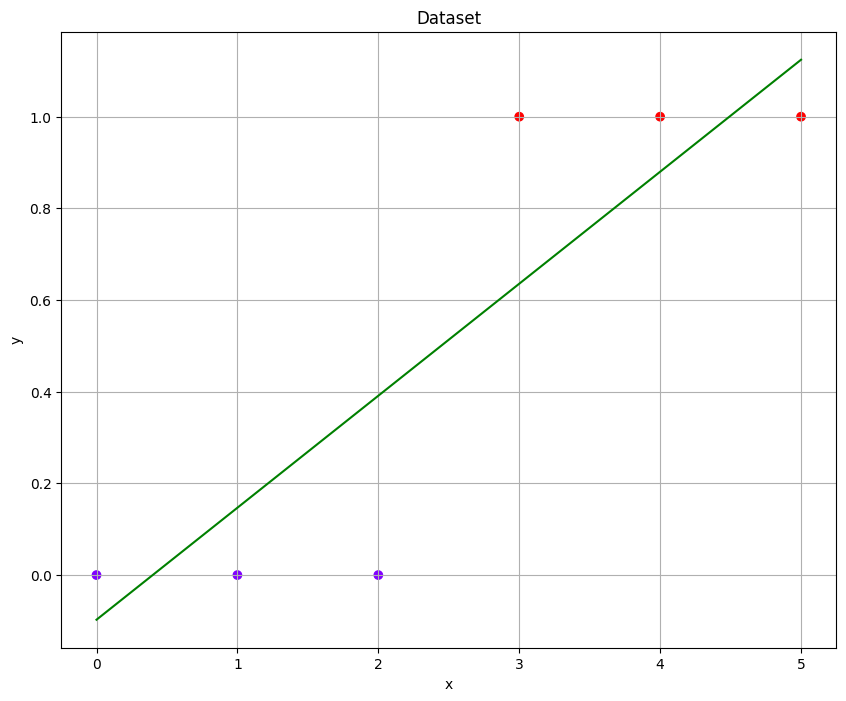

In [43]:
plot_data(hours, passed, w1, b1)

Let's also make a prediction for x = 20 using the regression line

In [45]:
x= 20
y = w1 * x + b1
print(y.item())

4.78937764761028


We can observe that linear regression doesn’t restrict its predictions to just 0 or 1. It can output any real number, including values below 0 or above 1. However, in our case, we’re dealing with a classification problem where we want to predict discrete categories. One simple approach is to apply a threshold. For example, 0.5. If the predicted value is below 0.5, we classify the student as having failed (y = 0). If it's 0.5 or higher, we classify them as having passed (y = 1). Let’s visualize this by drawing a vertical line on the plot at the point where the regression line crosses this threshold.

(1,)


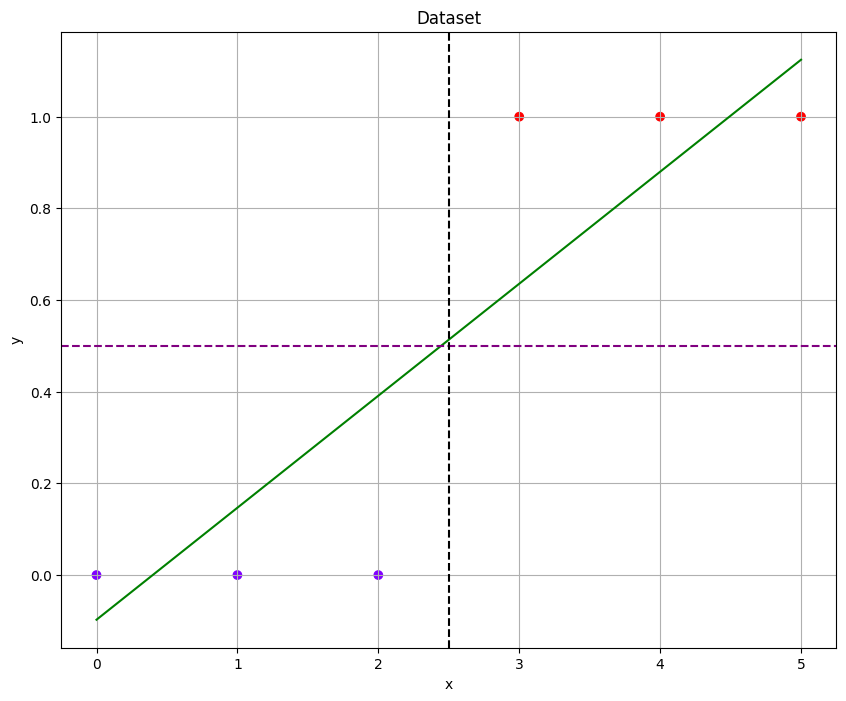

In [46]:
plot_data(hours, passed, w1, b1, thresh=(2.5, 0.5))

At first glance, this looks like a pretty good model. It classifies students who studied less than 2.5 hours as having failed, and those who studied 3 hours or more as having passed. Essentially, the model is saying: the more you study, the more likely you are to pass. That seems reasonable!

But real-world data is rarely this clean. In practice, we want models that make accurate predictions even when the data is messy or contains outliers.

Let’s test how robust our model really is by adding a new data point: (30, 1). This represents a student who studied for 30 hours and passed. While this data point shouldn’t affect how we classify the other students, let’s see what impact it has on the model’s decision boundary.

In [47]:
new_hours = np.array([0, 1, 2, 3, 4, 5, 30])
new_passed = np.array([0, 0, 0, 1, 1, 1, 1])
w = np.zeros((1))
b = 0
num_iters = 1000
alpha = 0.01
print(f"Start: w = {w.item()}, b = {b:.3f}")
w2, b2 = gradient_descent(new_hours.reshape(-1,1), new_passed.reshape(-1,1), w.reshape(-1,1), b, alpha, num_iters)

Start: w = 0.0, b = 0.000
Iteration    0: w: 0.06, b: 0.005714285714285714
Iteration  100: w: 0.034107554041448024, b: 0.21053866561304294
Iteration  200: w: 0.029262380675862187, b: 0.31283979434780196
Iteration  300: w: 0.026851427593004625, b: 0.36374472655409323
Iteration  400: w: 0.025651739918456883, b: 0.3890749663566833
Iteration  500: w: 0.025054776615149495, b: 0.4016792665815921
Iteration  600: w: 0.024757728314115636, b: 0.407951152888148
Iteration  700: w: 0.0246099173973336, b: 0.4110720368039898
Iteration  800: w: 0.02453636684328597, b: 0.41262498530147435
Iteration  900: w: 0.024499768166283714, b: 0.41339773081232084


(1,)


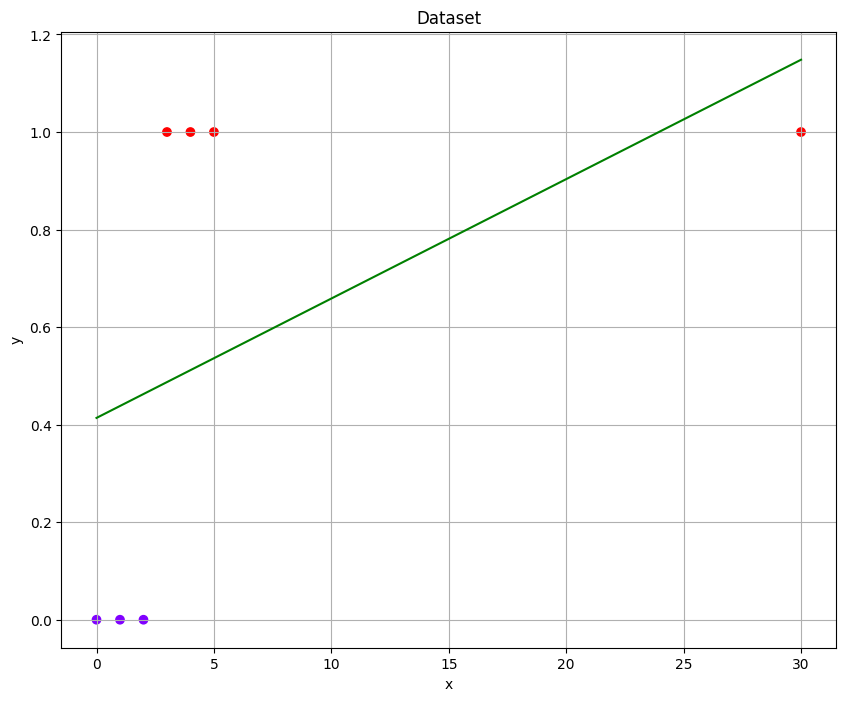

In [48]:
plot_data(new_hours, new_passed, w2, b2)

We can see that adding the new data point has shifted the regression line. If we continue using the same threshold of 0.5 to make predictions, we now notice that some of the original points are being misclassified. That’s a problem adding just one new data point shouldn’t drastically change how we classify the rest of the data.

What we’re observing here is a key limitation of linear regression when used for classification: adding an outlier causes the regression line and with it, the decision boundary to shift. This shift can lead to incorrect predictions. You'll learn more about decision boundaries in a later section, but for now, just know that they define where the model draws the line between different classes.


❓Question: Why does linear regression fail to properly classify the data?

<details>
<summary>✅ Answer</summary>

In linear regression, the model tries to minimize the squared error between predictions and the true values.

In the first plot, the x-values are close together, and the model can draw a line that lands nicely between class 0 and class 1. A threshold at 0.5 gives a good split.

But in the second plot, when we add the point (30, 1), the model tries to accommodate the new point because it's trying to minimize squared error across all points, and not just preserve the decision boundary. The loss function doesn’t care if a predicted 0.4 or 0.49 results in a wrong class, it only cares about how close it is to the actual label numerically.

This is misaligned with classification goals (i.e. getting the label right).
</details>

#### The Sigmoid Function

So far we've seen that the objective function of linear regression doesn't align with the goals of classification tasks.

In classification tasks, ideally we want our model to be able to output the probability that an input belongs to a class but linear regression doesn’t "cap" predictions between 0 and 1. It can happily predict values like 1.5 or -0.2, which makes no sense in a classification task. What we've done to address this issue is to manually impose a decision boundary (threshold like 0.5 or 0.6). But this decision boundary is fragile. A single point far from others can shift the boundary inappropriately just as we've seen in the example above.


We want a model that outputs probabilities (values between 0 and 1) for each input. But just predicting probabilities isn't enough. We also need an objective function that rewards correct classifications, not just predictions close in value to the labels. For now, let’s focus on building a model that can output valid probabilities.


How can we get this model? For now let's focus on getting the model to output probabilities.


🤔 **Pause and reflect:** How can we turn the scores from the linear regression model into probabilities?




Sigmoid function:

$$
\
\sigma(z) = \frac{1}{1 + e^{-z}}
\
$$


The sigmoid function maps any real-valued input 𝑧 to the range (0,1). We apply the sigmoid function to the model’s output to squash it into a range between 0 and 1, allowing us to interpret the result as a probability.


⏸️📖 **Pause and read:** Read the first three sections of this article about the sigmoid function https://en.wikipedia.org/wiki/Sigmoid_function

For now we'll modify our linear regression model to use the sigmoid function to convert it's output scores into probabilities and use this in our gradient descent to see how the behavior of the model changes. We'll use an already implemented loss function and then discuss it in detail in the next section.

**💻 Code task: Implement the sigmoid function**

Using the sigmoid function defined above. Your code should take in the array `x` as input and output the array after applying the sigmoid function.

In [56]:
def sigmoid(x: np.array):
  # your code here
  x_out =

  return x_out

🧪 Test your code

In [57]:
def test_sigmoid(n, x):
  y_pred = sigmoid(x)
  y = jax.nn.sigmoid(x)
  assert np.allclose(y_pred, y)
  assert y_pred.shape == y.shape
  for i in range(len(x)):
    if x[i] > 0:
      assert sigmoid(x[i]) > 0.5
    elif x[i] < 0:
      assert sigmoid(x[i]) < 0.5
    else:
      assert sigmoid(x[i]) == 0.5
  print(f"Test {n}: passed!")

test_sigmoid(1, np.array([0.0, 0.0, 0.0]))
test_sigmoid(2, np.array([1.0]))
test_sigmoid(3, np.array([-1.0]))

Test 1: passed!
Test 2: passed!
Test 3: passed!


<details>
<summary>🔓Solution</summary>

```python

def sigmoid(x: jnp.array):
  x_out = 1 / (1 + np.exp(-x))
  return x_out
```
</details>

💻 **Code task: Implement gradient descent with logistic regression [Optional]**

Now modify your `gradient_descent` function to support logistic regression. When the argument logistic=True, apply the sigmoid function to the model’s predictions (y_hat). Otherwise, keep using the linear output.

In [ ]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, logistic=False):
  """
    Performs gradient descent to optimize the parameters of a linear regression model.

    Parameters:
    ----------
    x : np.ndarray
        Input features of shape (n_samples, 1).
    y : np.ndarray
        Target labels of shape (n_samples, 1).
    w_in : np.ndarray
        Initial weight parameter of the model of shape (1, 1).
    b_in : float
        Initial bias parameter of the model.
    alpha : float
        Learning rate that controls the step size in each iteration.
    num_iters : int
        Number of iterations to run the gradient descent loop.

    Returns:
    -------
    w : np.ndarray
        Optimized weight parameter of shape (1).
    b : float
        Optimized bias parameter.
  """
  #your code here
  return w, b

In [58]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, logistic=False):
    w = w_in
    b = b_in

    for i in range(num_iters):

        y_hat  =  sigmoid(x @ w + b) if logistic else x @ w + b

        # Calculate the gradient
        dj_db,dj_dw = compute_gradient(x, y, y_hat, w, b)

        # Update Parameters using w, b, alpha and gradient
        w = w - (alpha * dj_dw)
        b = b - (alpha * dj_db)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: w: {w.item()}, b: {b}")

    return w.reshape(1), b

Test your code

In [59]:
def test_gradient_descent(logistic):
  hours = np.array([0, 1, 2, 3, 4, 5])
  passed = np.array([0, 0, 0, 1, 1, 1])
  w = np.zeros((1))
  b = 0.0
  w, b = gradient_descent(hours.reshape(-1, 1), passed.reshape(-1, 1), w.reshape(-1, 1), b, 0.01, 100, logistic=logistic)
  assert w != 0.0
  assert b != 0.0
  print("Test passed!")

test_gradient_descent(True)

Iteration    0: w: 0.0075, b: 0.0
Iteration   10: w: 0.07374353131938315, b: -0.0023837109637174
Iteration   20: w: 0.12678794417391018, b: -0.008347510049629487
Iteration   30: w: 0.1698726977065872, b: -0.016998651727316617
Iteration   40: w: 0.20542015106376507, b: -0.02766871014307152
Iteration   50: w: 0.23519951177908602, b: -0.039866413796632305
Iteration   60: w: 0.2605040761737472, b: -0.05322969285713104
Iteration   70: w: 0.28228973348320624, b: -0.06748862670103094
Iteration   80: w: 0.3012733880869223, b: -0.0824390968378347
Iteration   90: w: 0.31800093484709213, b: -0.09792449653862488
Test passed!


<details>
<summary>💡Hint</summary>

You can use a simple `if logistic:` condition to decide whether to apply the sigmoid function.
</details>

<details>
<summary>🔓Solution</summary>

```python

def gradient_descent(x, y, w_in, b_in, alpha, num_iters, logistic=False):
    w = w_in
    b = b_in

    for i in range(num_iters):

        y_hat  =  sigmoid(x @ w + b) if logistic else x @ w + b

        # Calculate the gradient
        dj_db,dj_dw = compute_gradient(x, y, y_hat, w, b)

        # Update Parameters using w, b, alpha and gradient
        w = w - (alpha * dj_dw)
        b = b - (alpha * dj_db)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: w: {w.item()}, b: {b}")

    return w.reshape(1), b
```
</details>

In [60]:
w = np.zeros((1))
b = 0.0
alpha = 0.01
num_iters = 30000
print(f"Start: w = {w.item()}, b = {b:.3f}")
log_w, log_b = gradient_descent(new_hours.reshape(-1,1), new_passed.reshape(-1,1), w.reshape(-1,1), b, alpha, num_iters = 30000, logistic=True)

Start: w = 0.0, b = 0.000
Iteration    0: w: 0.027857142857142858, b: 0.0007142857142857143
Iteration 3000: w: 1.2357492260919938, b: -2.622387391760009
Iteration 6000: w: 1.669713598496622, b: -3.80494889166415
Iteration 9000: w: 1.972246907845964, b: -4.6076660753382495
Iteration 12000: w: 2.2119960807238654, b: -5.234923574895938
Iteration 15000: w: 2.4141235145487543, b: -5.759088668365956
Iteration 18000: w: 2.5907719583092415, b: -6.214385781207171
Iteration 21000: w: 2.7487875642494446, b: -6.619837856857195
Iteration 24000: w: 2.8924415373337333, b: -6.9871831275101455
Iteration 27000: w: 3.0245963501966804, b: -7.324218225111774


Let's visualize our new model on the new dataset

(1,)
using logistic regression


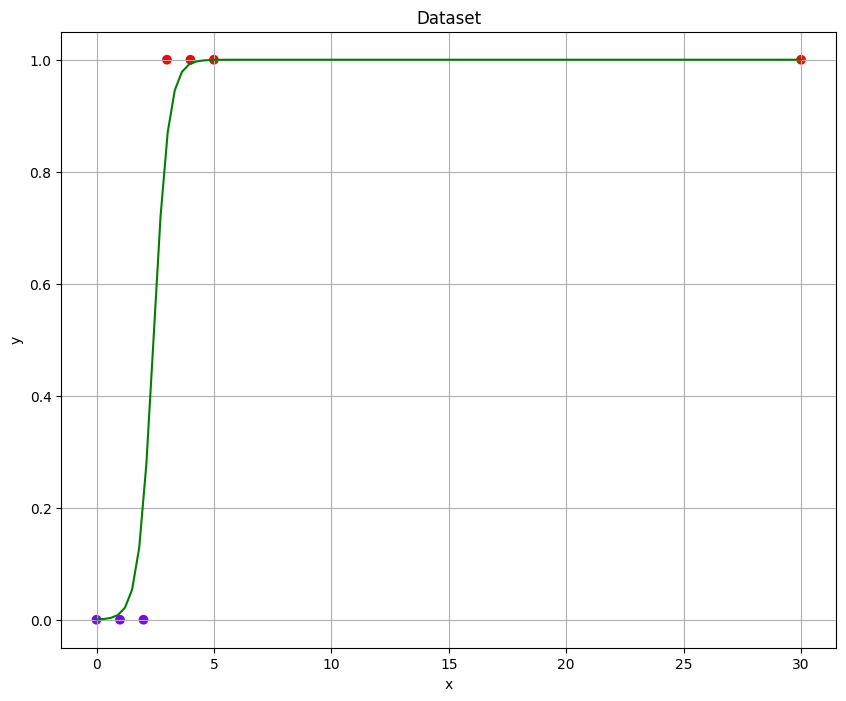

In [61]:
plot_data(new_hours, new_passed, log_w, log_b, logistic=True)

#### Loss landscape visualisation

In this subsection, we’ll explore the objective function used to optimize a logistic regression model

Remember that in linear regression our loss function was the mean squared error loss and this is what the loss landscape looked like

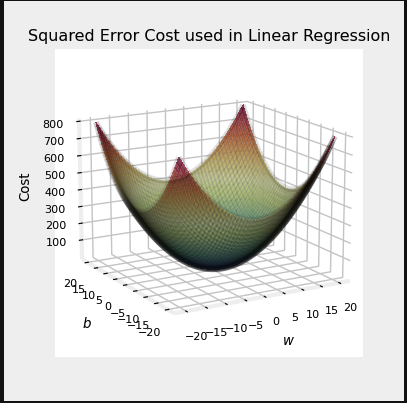

Run the cell below to use the mean squared error function to optimise the logistic regression model and see what the loss landscape looks like.

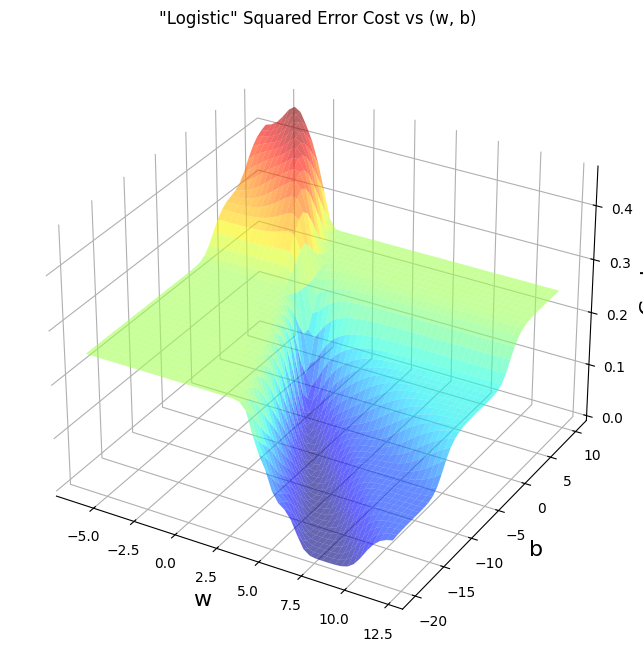

In [62]:
x_train = np.array([0, 1, 2, 3, 4, 5],dtype=np.longdouble)
y_train = np.array([0,  0, 0, 1, 1, 1],dtype=np.longdouble)
plt_logistic_squared_error(x_train, y_train, compute_cost_logistic_sq_err)
plt.show()

Ideally, we want a nice, smooth, convex bowl where gradient descent can easily roll down to the global minimum.

🧨 Problems with the Landscape
1. Non-convexity: The surface isn’t a clean bowl like in linear regression. There are ripples, plateaus, and flat regions — which can confuse optimization algorithms.

2. Multiple low-gradient regions: The gradients (slopes) are nearly flat in large regions. Gradient descent might get stuck or slow down dramatically in these flat areas.

<details>
<summary>🔬 Note: Why does MSE loss cause this?</summary>

In linear regression, MSE makes sense: you're penalizing how far your prediction is from the true value. But in classification, you're predicting a probability (like 0.9) and the label is discrete (0 or 1).
If your model predicts 0.95 for a class 1 label, that’s very good, but MSE still penalizes it for not being exactly 1.
In other words, MSE doesn’t care about probability confidence, it just cares about numbers being numerically close.
That causes small gradients near 0 and 1 (where sigmoid flattens), making training slow and poor handling of uncertainty.

We really want to maximize the ability of the model to make true predictions.
</details>






#### Loss function derivation

1️⃣ **We need a loss function that:**

1. Understands that we're predicting probabilities

2. Penalizes confident wrong predictions harshly and rewards confident correct predictions

3. Produces a clean, convex surface for optimization


**What Makes a Good Model?**

🎲 **Think of it as a guessing game**

Since our model assigns probabilities to outcomes, better models would give higher probabilities to the actual outcome of events for every datapoint in the dataset. We can then calculate the total probabilities assigned by a model and use this value to evaluate how good a model is. Our new goal during gradient descent then becomes to maximize this probability. This method is called the **maximum likelihood**.

```
Bad Model:  [▂    ] 0.2 → ✓ (correct outcome)
Good Model: [████▉ ] 0.9 → ✓ (correct outcome)
```
> 💡 **Key Insight**: We want to maximize the probability our model assigns to the correct answers.




2️⃣ **The Math Behind It**

If we assume that the datapoints in our dataset are independent events then the probability for the whole arrangement (i.e the total probability by the model) is the product of the probabilities of all the datapoints.

```
Total Probability = P₁ × P₂ × P₃ × ... × Pₙ
```

❓Question: Which of the following statement is true if the model has a high total probability

1. The model classifies all red points correctly
2. The model classifies all purple points correctly
3. The model classifies most points correctly
4. The model classifies all points correctly

<details>
<summary>✅ Answer </summary>
3. The model classifies most points correctly.
</details>

3️⃣ **The Logarithm Trick**

🤔 **Problem**
What happens when you multiply many small numbers (0.1 × 0.3 × 0.2 × ...)?

<details>
<summary>✅ Answer</summary>

You get tiny numbers that cause **numerical instability**! Your computer can't handle numbers like 0.0000000001 reliably.

</details>

🔄 **From Multiplication to Addition**

```
log(A × B × C) = log(A) + log(B) + log(C)
```

**New Formula:**
```
log(Total Probability) = log(P₁) + log(P₂) + ... + log(Pₙ)
```

> 💡 **Key Insight**: Maximizing probability = Maximizing log probability


4️⃣ **From Maximizing to Minimizing**

📊 **The Sign Flip**

Let's see what happens to log(p) for different probability values:

| Probability (p) | log(p) | -log(p) |
|----------------|--------|---------|
| 0.9 (confident, correct) | -0.11 | **0.11** (small penalty) |
| 0.5 (uncertain) | -0.69 | **0.69** (medium penalty) |
| 0.1 (confident, wrong) | -2.30 | **2.30** (large penalty) |

The log of probabilities are negative numbers. This is because the logarithm of a number between 0 and 1 is always a negative number since the logarithm of one is zero. So we'll take the negative of the logarithm of the probabilities and we'll get positive numbers.

**New objective:**
```
Minimize: -log(P₁) - log(P₂) - ... - log(Pₙ)
```

5️⃣ Binary Classification: The Final Formula

For binary classification (0 or 1), the probability formula is:

```
p(y|x) = ŷʸ(1-ŷ)¹⁻ʸ
```

Question: What is p(y|x) when y=1 and when y=0?

<details>
<summary>✅ Answer</summary>

**When y=1:** p(y|x) = ŷ¹(1-ŷ)⁰ = ŷ  
**When y=0:** p(y|x) = ŷ⁰(1-ŷ)¹ = (1-ŷ)

It gives us exactly what we want.
</details>

Taking the negative log:

```
L = -log(p(y|x)) = -(y log(ŷ) + (1-y)log(1-ŷ))
```

> **This is Cross-Entropy Loss!** It penalizes confident wrong predictions harshly and rewards confident correct predictions.


<details>
<summary>🔬 Note</summary>
This method is actually much more powerful than we think. When a pont is misclassified the negative log of it's probability is high whereas the points that are correctly classified have small values and the reason for this is again is that a correctly classified point will have a probability that as close to 1, which when we take the negative of the logarithm, we'll get a small value. Thus we can think of the negatives of these logarithms as errors at each point. Points that are correctly classified will have small errors and points that are misclassified will have large errors.And now we've concluded that our cross entropy will tell us if a model is good or bad.So now our goal has changed from maximizing a probability to minimizing a cross entropy in order to get from a bad model to a good model. The cross entropy is actually the error function that we're looking for.
</details>

**💻 Code task: Implement Cross Entropy Loss**

Implement the function `cross_entropy_loss` that computes the cost (or loss) of a logistic regression model using the equation:

  `L = -(y * log(ŷ) + (1-y) * log(1-ŷ))`

Where:
- y is the true label (0 or 1) `y_true`
- ŷ is the predicted probability (between 0 and 1) `y_pred`
- L is the loss (higher = worse prediction) `loss`

In [63]:
def cross_entropy_loss(y_true, y_pred):
    """
    Computes binary cross-entropy loss between true labels and predicted probabilities.

    Parameters:
    -----------
    y_true : array-like of shape (n_samples,)
        True binary labels (0 or 1)
    y_pred : array-like of shape (n_samples,)
        Predicted probabilities (between 0 and 1)

    Returns:
    --------
    float
        Average cross-entropy loss across all samples
    """
    # Convert inputs to numpy arrays for easier computation
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # TODO: Implement the cross-entropy formula
    # Formula: -(y * log(ŷ) + (1-y) * log(1-ŷ))
    loss = # YOUR CODE HERE

    # TODO: Return the average loss across all samples
    return # YOUR CODE HERE


<details>
<summary>💡 Hint</summary>

1. Use `np.log()` for natural logarithm
2. Remember to take the average across all samples
3. The formula handles both y=0 and y=1 cases automatically
</details>

<details>
<summary>🔓 Solution</summary>

```python
def cross_entropy_loss(y_true, y_pred):
  m = y_true.shape[0]
  return (1/m)*(np.dot(-y_true.T, np.log(y_pred)) - np.dot((1-y_true).T, np.log(1-y_pred)))
```
</details>

**💻 Code task: Implement Logistic Regression Cost Function**

Implement a function `compute_cost` that computes the cost (or loss) of a logistic regression model using the `cross_entropy_loss` function.

In [ ]:
def compute_cost(x, y, w, b, lambda_=0, safe=True):
    """
    Computes the total cost for logistic regression.

    This is the objective function that we want to MINIMIZE during training.
    Lower cost = better model performance on the training data.

    Parameters
    ----------
    x : np.ndarray of shape (m, n)
        Input feature matrix where:
        - m = number of training examples
        - n = number of features

    y : np.ndarray of shape (m,) or (m, 1)
        True binary labels (0 or 1)

    w : np.ndarray of shape (n, 1)
        Model weights (one per feature)

    b : float
        Model bias term (intercept)

    lambda_ (to be ignored) : float, default=0


    safe (to be ignored) : bool, default=True

    Returns
    -------
    total_cost : float
        The computed cost (loss)
        - Lower is better (perfect predictions → cost ≈ 0)
        - Higher means worse predictions or overfitting
    """

    # Convert inputs to numpy arrays and ensure proper shapes
    X = np.array(X)
    y = np.array(y).flatten()  # Ensure y is 1D
    w = np.array(w).flatten()  # Ensure w is 1D

    # Get dimensions
    m, n = X.shape  # m = samples, n = features

    # STEP 1: Compute linear combination z = X @ w + b
    # TODO: Implement the linear combination
    # Hint: Use matrix multiplication (X @ w) and add bias b
    z = # YOUR CODE HERE

    if safe:
        # Clip z to prevent numerical overflow in sigmoid
        z = np.clip(z, -500, 500)

    # STEP 2: Apply sigmoid activation to get predicted probabilities
    # TODO: Use the sigmoid function to convert z to probabilities
    # Hint: y_pred = sigmoid(z)
    y_pred = # YOUR CODE HERE

    if safe:
        # Clip predictions away from 0 and 1 to prevent log(0)
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

    # STEP 3: Compute cross-entropy loss
    # TODO: use the cross-entropy_loss function previously implemented
    # Hint: Use np.log() and remember to take the mean across all samples
    total_cost = # YOUR CODE HERE

    return total_cost


<details>
<summary>💡 Hints</summary>

- Make sure all inputs (y, w, predictions) are 2D column vectors to avoid broadcasting issues.
- Use np.dot() or matrix multiplication to compute the cost efficiently:
</details>

Test your code

In [ ]:
x_test = np.array([
    [1.0, 2.0],
    [2.0, 1.0],
    [3.0, 4.0],
    [4.0, 3.0]
])
y_test = np.array([0, 1, 1, 0])

# Reshape inputs
w_test = np.array([0.1, -0.2])
b_test = 0.05

# Run student function
cost = compute_cost_matrix(x_test, y_test, w_test, b_test, logistic=True, lambda_=0)

# Print result
print("Logistic Regression Cost:", cost)

# Expected behavior: cost should be a small positive float
assert isinstance(cost, float) or np.isscalar(cost), "Returned cost must be a scalar"
assert cost > 0, "Cost should be positive"
print("All tests passed!")

<details>
<summary>🔓Solution</summary>

```python

def compute_cost_matrix(X, y, w, b, logistic=False, lambda_=0, safe=True):
    m = X.shape[0]
    y = y.reshape(-1,1)             # ensure 2D
    w = w.reshape(-1,1)             # ensure 2D
    if logistic:
        if safe:  #safe from overflow
            cost = -(y * z) + log_1pexp(z)
            cost = np.sum(cost)/m
        else:
            f    = sigmoid(X @ w + b)           
            cost = (1/m)*(np.dot(-y.T, np.log(f)) - np.dot((1-y).T, np.log(1-f)))
            cost = cost[0,0]
    else:
        f    = X @ w + b
        cost = (1/(2*m)) * np.sum((f - y)**2)
    reg_cost = (lambda_/(2*m)) * np.sum(w**2)                           
    total_cost = cost + reg_cost
    return total_cost
```
</details>

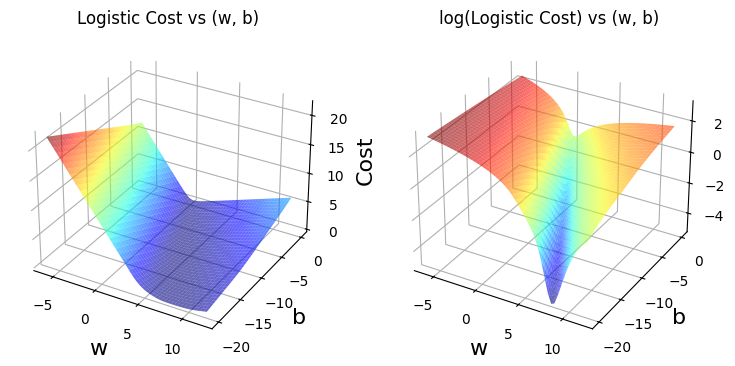

In [ ]:
# visualze the new losslandscape
cost = plt_logistic_cost(x_train,y_train, compute_cost_matrix)

This curve is well suited to gradient descent! It does not have plateaus, local minima, or discontinuities. Note, it is not a bowl as in the case of squared error. Both the cost and the log of the cost are plotted to illuminate the fact that the curve, when the cost is small, has a slope and continues to decline.

Using mean squared error in logistic regression is like using a thermometer to measure speed, it's the wrong tool for the job. We use cross-entropy not just for theoretical beauty, but because it gives us:

1. Faster training

2. Better decision boundaries

3. A smoother optimization surface

 🎓 Quick recap

Let's think about what we've actually done here

- Linear regression treats classification as a numerical prediction problem.
- It can output nonsensical values and is **sensitive to outliers**.
- Logistic regression fixes this by:
  - Outputting **probabilities**
  - Being **bounded between 0 and 1**
  - Having a natural **decision boundary** (usually 0.5)

👉 Logistic regression is *exactly* what we need when the task is to **classify**.


#### Non-linear Models: Working with more complex data


Let's look at a more complex dataset where we would need a more complex decision boundary to classify the data.

Let's generate a dataset with two spirals arranged in a swiss-roll type structure, and where each spiral forms a "class" that we want to be able to classify (i.e. the classes are very non-linearly distributed).



First we define some hyperparameters that will be used by the next few cells. Try changing these values to see how the models work with different data.

In [ ]:
num_classes = 2    # The number of classes (distinct groups) of data (these are our "y" values)
dimensions = 2    # The number of dimensions of our input or "X" values
points_per_class = 100    # number of X points to generate for each of the y values

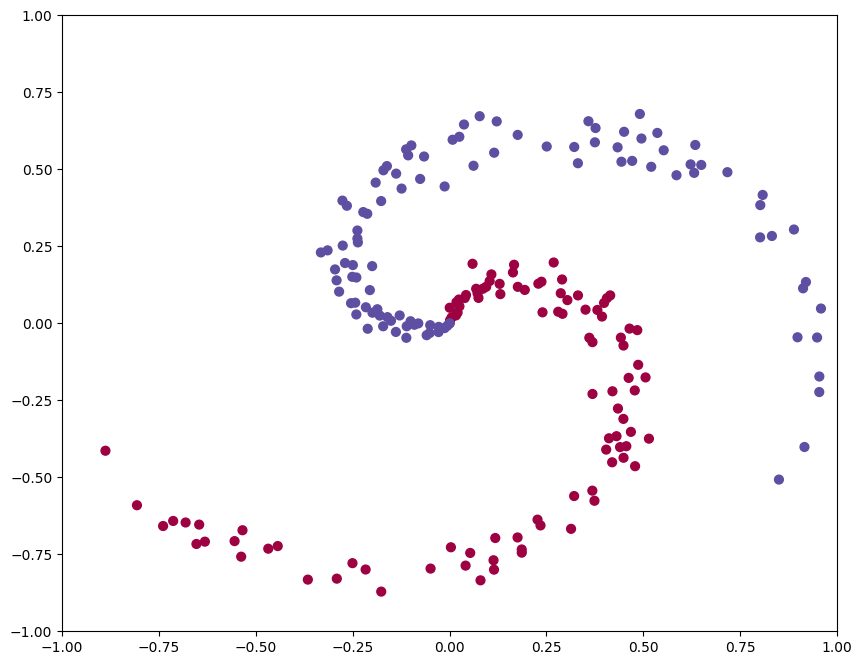

In [ ]:
# Spiral dataset
# Setting a random seed allows us to get the exact same data each time we run the cell.
np.random.seed(0)

def generate_spiral_data(num_classes, dimensions, points_per_class):
    """Generate `num_classes` spirals with `points_per_class` points per spiral."""

    x = np.zeros((points_per_class*num_classes, dimensions), dtype='float32')    # Create an empty matrix to hold our X values
    y = np.zeros(points_per_class*num_classes, dtype='uint8')    # Create an empty vector to hold our y values

    for y_value in range(num_classes):     # Generate data for each class
        ix = range(points_per_class*y_value, points_per_class*(y_value+1))    # The indices in X and y where we will save this class of data

        radius = np.linspace(0.0, 1, points_per_class)    # Generate evenly spaced numbers in the interval 0 to 1
        theta = np.linspace(y_value*4, (y_value+1)*4, points_per_class) + np.random.randn(points_per_class) * 0.2

        x[ix] = np.column_stack([radius*np.sin(theta), radius*np.cos(theta)])     # Convert polar coordinates to standard Euclidian coordinates
        y[ix] = y_value

    return x, y


def plot_data(x, y):
    """Use Matplotlib to plot X, y data on a figure."""
    fig = plt.figure()
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    return fig

x, y = generate_spiral_data(num_classes, dimensions, points_per_class)
fig = plot_data(x, y)

# fig.savefig('spiral_raw.png')    # Uncomment this line if you want to save your image to a file

In the cells below, we have implemented a linear classifier using all the functions you've implemented in the previous section. Take sometime to read through the code and reassure yourself that yoou understand it.

In [ ]:
learning_rate = 1e-0
reg_lambda = 1e-3    # Regularization strength.
w_in = 0.01 * np.random.randn(dimensions, num_classes)

In [ ]:
class LinearModel(object):
    def __init__(self, w_in, b):
        # Initialize the model parameters.
        self.w = w_in
        self.b = b

    def predictions(self, x):
        """Make predictions of classes (y values) given some inputs (X)."""
        y_pred = sigmoid(x @ self.w + b)
        return y_pred


    def compute_loss(self, y_true, y_pred):
        """Calculate the cross entropy loss given model predictions and true targets."""
        return cross_entropy_loss(y_true, y_pred)


    def update(self, probs, X, y):
        """Update the model parameters using back-propagation and gradient descent."""
        # Calculate the gradient of the loss with respect to logits

    def compute_gradient(self):
      pass

<details>
<summary>🔓Solution</summary>

```python

def softmax(logits):
    """Convert un-normalised model scores(logits) into a probability distribution.

    Args:
        logits: The un-normalised scores assigned by the model.
    """
    exp_logits = np.exp(logits)
    # Notice this trick for numerical stability.
    #exp_logits -= np.max(exp_logits)
    probs = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)    
    return probs

def cross_entropy(predictions, targets):
    """Calculate the cross entropy loss given some predictions and target (true) values.

    Args:
        predictions: The model predictions (of shape [num_examples, num_classes])
        targets: The correct labels for the data (of shape [num_examples])
    """
    num_examples = predictions.shape[0]
    
    # NOTE: xent(pred, trgt) = -sum_i p_trgt[i] * log(pred[i]). But since we
    # use one-hot encodings for p_trgt[i], it means all p_trgt[i] are zero
    # except for the observed class. We therefore only compute the logs of the
    # predictions of the observed classes below. To do that, we use advanced
    # indexing X[[0, 1, 2, 3, ..., num_examples], target_ids] which extracts the
    # predicted log-prob for the correct target class (target_ids) for each example.
    # QUESTION: Can you see why this works? Lookup "advanced indexing" if unsure.
    correct_logprobs = -np.log(predictions[range(num_examples), targets])
    
    # NOTE: When dealing with a batch of data, we compute the average cross
    # entropy over the batch (i.e. we want the average per-example loss).
    # QUESTION: Why do we use the average loss?
    crossentropy = np.sum(correct_logprobs) / num_examples
    return crossentropy

def l2_loss(parameters):
    """Calculate the L2 regularisation of a list of parameters."""
    reg = 0.0
    for param in parameters:
        reg += 0.5 * reg_lambda * np.sum(param * param)
    return reg

class LinearModel(object):
    def __init__(self):
        # Initialize the model parameters.
        self.W = np.copy(W_init)
        self.b = np.zeros((1, num_classes))
    # convert to task
    def predictions(self, X):
        """Make predictions of classes (y values) given some inputs (X)."""
        # Evaluate class scores/"logits": [points_per_class*num_classes x num_classes].
        logits = self.get_logits(X)

        # Compute the class probabilities.
        probs = softmax(logits)
        
        return probs
    
    def loss(self, probs, y):
        """Calculate the loss given model predictions and true targets."""
        num_examples = probs.shape[0]
        data_loss = cross_entropy(probs, y)
        regulariser = l2_loss([self.W])
        return data_loss + regulariser
    
    def update(self, probs, X, y):    
        """Update the model parameters using back-propagation and gradient descent."""
        # Calculate the gradient of the loss with respect to logits
        dlogits = self.derivative_loss_logits(probs, y)    
        
        # Gradient of the loss wrt W
        dW = self.derivative_loss_W(X, dlogits)
        
        # Gradient of the loss wrt b
        db = self.derivative_loss_b(dlogits)
        
        # Don't forget the gradient on the regularization term.
        dW += self.derivative_regularisation()
        
        # Perform a parameter update.
        self.W += -learning_rate * dW
        self.b += -learning_rate * db
        
    
    ##### Now we define some helper functions     
    ## IMPLEMENT-ME: ...
    def get_logits(self, X):
        """Calculate the un-normalised model scores."""
        return np.dot(X, self.W) + self.b

    def derivative_loss_logits(self, probs, y):
        """Calculate the derivative of the loss with respect to logits."""
        num_examples = y.shape[0]
        dlogits = probs
        dlogits[range(num_examples), y] -= 1
        dlogits /= num_examples
        return dlogits
    
    def derivative_loss_W(self, X, dlogits):
        """Calculate the derivative of the loss wrt W."""
        return np.dot(X.T, dlogits)
    
    def derivative_loss_b(self, dlogits):
        """Calculate the derivative of the loss wrt b."""
        return np.sum(dlogits, axis=0, keepdims=True)
    
    def derivative_regularisation(self):
        return reg_lambda * self.W
```
</details>

In [ ]:
def train_model(model, epochs, report_every, render_fn=None,render_args={}):
    frames = []
    for i in range(epochs):

        # Get the model predictions for our spiral dataset X.
        probs = model.predictions(X)

        # Compute the loss
        loss = model.loss(probs, y)

        # Print the loss value every `report_every` steps.
        if i % report_every == 0:
            print("iteration %d: loss %f" % (i, loss))
            if render_fn:
                frame = render_fn(**render_args)
                frames.append(frame)

        # Use back-propagation to update the model parameters:
        model.update(probs, X, y)

    if frames: return frames

In [ ]:
# Define a function that calcuates and prints the accuracy of a model's predictions
def evaluate_model(model):
    # Get the probabilites/scores that the model assigns to each class for each X datapoint.
    scores = model.get_logits(X)    # The shape of scores is [num_data_points, num_classes]

    # The index of the maximum score along the 2nd dimension is the class that the model thinks is most likely (y^) for each datapoint.
    predicted_class = np.argmax(scores, axis=1)

    # What proportion of the class predictions made by the model (y^) agree with the true class values (y) ?
    print ('Accuracy: %.2f' % (np.mean(predicted_class == y)))

In [ ]:
# Now evaluate the trained linear model
evaluate_model(linear_model)

Accuracy: 0.49


This is not a very good result (we are misclassifying around 50% of the data points, and these are data points that we've seen before!), lets visualise the decision boundary to determine what's going on.

In [ ]:
def plot_decision_boundary(X, model, render=True):
    """Overlays the classifier's decision boundary on the dataset [X, y].

    Args:
        X: 2-d matrix input data,
        model: The model to evaluate
    """

    step_size = 0.02    # Discretization step-size

    # Get the boundaries of the dataset.
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # Generate a grid of points, step_size apart, over the above region.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size),
                                             np.arange(y_min, y_max, step_size))

    # Flatten the data and get the logits of the classifier (the "scores") for
    #     each point in the generated mesh-grid.
    meshgrid_matrix = np.c_[xx.ravel(), yy.ravel()]
    Z = model.get_logits(meshgrid_matrix)

    # Get the class predictions for each point.
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)

    old_backend = plt.rcParams['backend']    # Save backend.
    if not render:
        plt.rcParams['backend'] = 'agg'

    # Overlay both of these on one figure.
    fig = plt.figure()
    axes = plt.gca()

    axes.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    axes.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    if not render:
        # Now we can save it to a numpy array.
        fig.tight_layout(pad=0)
        fig.canvas.draw()
        data = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
        data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        # Restore old backend
        plt.rcParams['backend'] = old_backend

        return data

    #fig.savefig('spiral_linear.png')

In [ ]:
from matplotlib import animation
from IPython.display import display
from IPython.display import HTML

def display_frames_as_gif(frames):
        """
        Displays a list of frames as a gif.
        """
        plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
        patch = plt.imshow(frames[0])
        #plt.axis('off')

        def animate(i):
                patch.set_data(frames[i])

        anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
        ##display(display_animation(anim, default_mode='loop'))
        HTML(anim.to_html5_video())
        # METHOD 2
        #plt.rcParams['animation.html'] = 'html5'
        #anim
        return anim

#display_frames_as_gif(frames)

In [ ]:
# Plot the decision boundary of our trained linear model on the dataset X
# plot_decision_boundary(X, linear_model)

# Create an instance of our LinearModel.
reset_matplotlib()
linear_model = LinearModel()

train_model(linear_model, 200, 10)

# For rendering animations.
#frames = train_model(linear_model, 200, 10,
#                                         plot_decision_boundary,
#                                        {'X':X, 'model':linear_model, 'render':False})

iteration 0: loss 1.096919
iteration 10: loss 0.917310
iteration 20: loss 0.851535
iteration 30: loss 0.822352
iteration 40: loss 0.807594
iteration 50: loss 0.799452
iteration 60: loss 0.794683
iteration 70: loss 0.791765
iteration 80: loss 0.789921
iteration 90: loss 0.788726
iteration 100: loss 0.787937
iteration 110: loss 0.787408
iteration 120: loss 0.787049
iteration 130: loss 0.786803
iteration 140: loss 0.786633
iteration 150: loss 0.786514
iteration 160: loss 0.786431
iteration 170: loss 0.786373
iteration 180: loss 0.786331
iteration 190: loss 0.786302


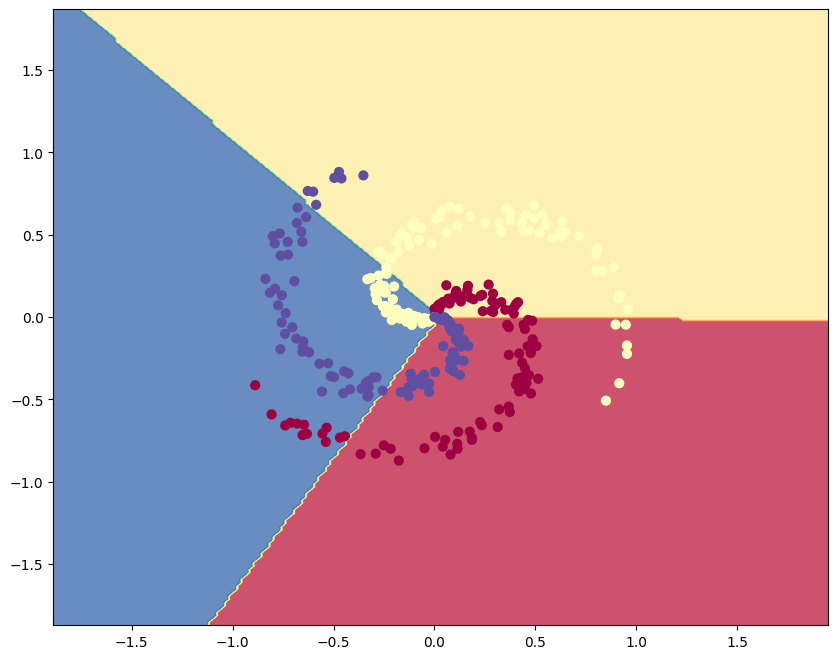

In [ ]:
plot_decision_boundary(X, linear_model)

What can you deduce from this decision boundary? Does it help explain why the linear model makes bad predictions?

The linear model resulted in decision boundaries that were straight lines in 2D space. Using these straight lines, it is impossible to accurately separate our spiral-shaped data. We need a more complex model that can represent more complex (nonlinear) decision boundaries. Intuitively, we want a "curved" decision boundary that can adapt to the curved shape of the data. Let's see how converting our model to be a non-linear function of its parameters could resolve this.

So far the logits (scores) were a linear function of the inputs (
; put another way, a small change in inputs leads to a proportionally small change in outputs). We can make the model more powerful by making logits a non-linear function of inputs, e.g. There are many different types, but a popular choice is the rectified linear unit


In code:

In [ ]:
def relu(value):
    """ ReLU is the "Rectified Linear Unit activation function", defined as:
                relu(x) = x if x > 0, and 0 if x <= 0
    """

<details>
<summary>🔓Solution</summary>

```python
def relu(value):
    """ ReLU is the "Rectified Linear Unit activation function", defined as:
                relu(x) = x if x > 0, and 0 if x <= 0
    """
    return np.maximum(0, value)    
```
</details>

QUESTION: Why does adding this "non-linearity" make the model more powerful? HINT: Think about the decision boundary of the linear model above, and convince yourself that adding a nonlinearity allows the model more freedom in how it structures its decision boundary.

<details>
<summary>Answer</summary>
</details>

In [ ]:
learning_rate = 1e-0    # How far along the gradient do we want to travel when doing
                                            # gradient descent?
reg_lambda = 1e-3    # Regularization strength
num_hidden = 100    # Size of hidden layer.

non_linear_W_init = 0.01 * np.random.randn(dimensions, num_hidden)
non_linear_W2_init = 0.01 * np.random.randn(num_hidden, num_classes)

In [ ]:
class NonLinearModel(object):
    def __init__(self):
        # Initialize the model parameters.
        # Initialize the model parameters.
        self.W = non_linear_W_init
        self.b = np.zeros((1, num_hidden))
        self.W2 = non_linear_W2_init
        self.b2 = np.zeros((1, num_classes))

    def predictions(self, X):
        """Make predictions of classes (y values) given some inputs (X)."""
        y_hat =


    def compute_loss(self, probs, y):
        """Calculate the cross entropy loss given model predictions and true targets."""


    def update(self, probs, X, y):
        """Update the model parameters using back-propagation and gradient descent."""
        # Calculate the gradient of the loss with respect to logits

    def compute_gradient(self):
      pass

<details>
<summary>🔓Solution</summary>

```python
class NonLinearModel(object):
    def __init__(self):
        # Initialize the model parameters.
        self.W = non_linear_W_init
        self.b = np.zeros((1, num_hidden))
        self.W2 = non_linear_W2_init
        self.b2 = np.zeros((1, num_classes))

    def predictions(self, X):
        """Make predictions of classes (y values) given some inputs (X)."""
        # Evaluate class scores/"logits": [points_per_class*num_classes x num_classes].
        logits = self.get_logits(X)

        # Compute the class probabilities.
        probs = softmax(logits)
        
        return probs
    
    def loss(self, probs, y):
        """Calculate the loss given model predictions and true targets."""
        data_loss = cross_entropy(probs, y)
        regulariser = l2_loss([self.W, self.W2])
        return data_loss + regulariser
    
    def update(self, probs, X, y):    
        """Update the model parameters using back-propagation and gradient descent."""
        hidden_output = self.hidden_layer(X)
        
        # Calculate the gradient of the loss with respect to logits
        dlogits = self.derivative_loss_logits(probs, y)    
        
        # Backpropagate the gradient to the parameters.
        
        # We first backprop into parameters W2 and b2.
        dW2 = self.derivative_loss_W2(hidden_output, dlogits)
        db2 = self.derivative_loss_b2(dlogits)

        # Next, backprop into the hidden layer.
        dhidden = self.derivative_hidden(hidden_output, dlogits)

        # Finally, backprop into W,b.
        dW = self.derivative_loss_W(X, dhidden)
        db = self.derivative_loss_b(dhidden)

        # Add regularization gradient contribution.
        dW2 += self.derivative_regularisation_W2()
        dW += self.derivative_regularisation_W()

        # Perform a parameter update (one step of gradient descent).
        self.W += -learning_rate * dW
        self.b += -learning_rate * db
        self.W2 += -learning_rate * dW2
        self.b2 += -learning_rate * db2
        

    ## DEFINE THE MODEL HELPER FUNCTIONS    
    
    def hidden_layer(self, X):
        """Calculate the output of the hidden layer."""
        return relu(np.dot(X, self.W) + self.b)
        
    def get_logits(self, X):
        """Calculate the logits from the input data X."""
        hidden_output = self.hidden_layer(X)
        logits = np.dot(hidden_output, self.W2) + self.b2
        return logits
    
    def derivative_loss_logits(self, logits, y):
        """Calculate the derivative of the loss with respect to logits."""
        num_examples = y.shape[0]
        dlogits = logits
        dlogits[range(num_examples),y] -= 1
        dlogits /= num_examples
        return dlogits
    
    def derivative_loss_W2(self, hidden_output, dlogits):
        """Calculate the derivative of the loss wrt W2."""
        dW2 = np.dot(hidden_output.T, dlogits)
        return dW2
    
    def derivative_loss_b2(self, dlogits):
        """Calculate the derivative of the loss wrt b2."""
        return np.sum(dlogits, axis=0, keepdims=True)
        
    def derivative_hidden(self, hidden_output, dlogits):
        """Calculate the derivative of the loss wrt the hidden layer."""
        # Calculate the gradient as if the hidden layer were a normal linear layer.
        dhidden = np.dot(dlogits, self.W2.T)
        
        # Now take the Relu non-linearity into account
        dhidden[hidden_output <= 0] = 0
        
        return dhidden
        
    def derivative_loss_W(self, X, dhidden):
        """Calculate the derivative of the loss wrt W."""
        return np.dot(X.T, dhidden)
    
    def derivative_loss_b(self, dhidden):
        """Calculate the derivative of the loss wrt b."""
        return np.sum(dhidden, axis=0, keepdims=True)
    
    def derivative_regularisation_W(self):
        """Calculate the gradient of the L2 loss wrt W."""
        return reg_lambda * self.W
    
    def derivative_regularisation_W2(self):
        """Calculate the gradient of the L2 loss wrt W2."""
        return reg_lambda * self.W2  
```
</details>

In [ ]:
# Create an instance of our non-linear model.
non_linear_model = NonLinearModel()

# Train the model for 10000 epochs
train_model(non_linear_model, 10000, 1000)

iteration 0: loss 1.098637
iteration 1000: loss 0.294363
iteration 2000: loss 0.266592
iteration 3000: loss 0.251493
iteration 4000: loss 0.248266
iteration 5000: loss 0.247068
iteration 6000: loss 0.246386
iteration 7000: loss 0.245916
iteration 8000: loss 0.245294
iteration 9000: loss 0.245017


In [ ]:
# evaluate training set accuracy of the non-linear model
evaluate_model(non_linear_model)

Accuracy: 0.98


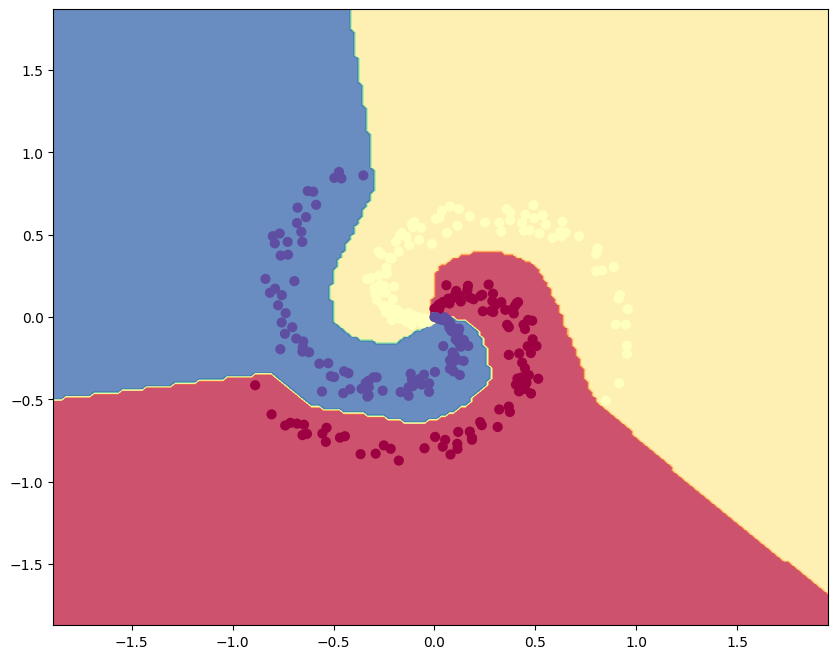

In [ ]:
plot_decision_boundary(X, non_linear_model)

## Binary classifier

Now that we have a solid understanding of logistic regression, let’s take things a step further by building a binary classifier using a Multi-Layer Perceptron (MLP) with JAX. We'll apply it to a real-world dataset related to tumor classification.

The code cell below loads the dataset for you. It reads the data from a CSV file, converts the target labels from "M" (malignant) and "B" (benign) to numerical values (1 and 0, respectively), and then splits the dataset into training and testing sets.

Feel free to open the dataset and explore it before we begin!

#### Load data

In [ ]:
df = pd.read_csv('/content/breast_winconsin_dataset.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


convert our target column "diagnosis" to 1s and 0s cause we want to work with numbers.

In [ ]:
def convert_diagnosis(diagnosis):
  if diagnosis == 'M':
    return 1
  else:
    return 0

df['diagnosis'] = df['diagnosis'].apply(convert_diagnosis)

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# drop non numeric features
df = df.drop(['id','Unnamed: 32'], axis=1)

In [ ]:
# split dataset into test and train
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
# split each set into input and target
y_train = train_set.pop('diagnosis')
x_train = train_set


y_test = test_set.pop('diagnosis')
x_test = test_set

In [ ]:
x_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,10.31,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,26.68,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,10.01,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,12.25,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,11.02,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020


### Builiding the MLP with JAX

If you took a look at the dataset, you would see that it contains a lot of features. The beautiful thing about deep neural networks is that we don't have to do feature extraction. The network itself learns the relevant features, usually in the first few layers.

When working with machine learning models, it’s important to organize your data into a format that can be easily shuffled, batched, and fed into the model during training. This is exactly what the `tf.data.Dataset` API is designed for. It allows you to:

- Efficiently load and preprocess data

- Shuffle and batch data for training and

- Iterate over data in a scalable way

One of the most common ways to create a dataset is using:

`tf.data.Dataset.from_tensor_slices((inputs, labels))`

It splits the given tensors into slices along the first dimension (like rows of a matrix). Each slice becomes one element in the dataset.

You can then apply `.shuffle()`, `.batch()`, `.map()`, etc. to prepare your data.




To learn more about tf.data.Dataset, refer to this [documentation](https://www.tensorflow.org/api_docs/python/tf/data/Dataset)

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

At the heart of our model is a **Multilayer Perceptron (MLP)** a neural network with fully connected layers.

Just as in the previous tutorial, we'll use the `linen` api in JAX to build the MLP in this section.

****************** Add this explanation to prac 1 *******************

linen is currently the most stable and widely used Flax module API and flax is a neural network library built on top of jax.

An MLP is made up of:
- **Linear (dense) layers** that apply a weight matrix and bias
- **Activation functions** like GELU or ReLU to introduce non-linearity
- An optional **sigmoid activation** at the end to squash the output into the range (0, 1) for binary classification

`linen` api provides out of the box modules that we can use to create each of the mlp components listed above.

The `flax.linen.Module` class is the base Module class used to create all other modules in flax including the out of the box modules. Our MLP is also going to be a module and hence would subclass the `flax.linen.Module` class.

The `flax.linen.Module` is a python dataclass that initialised with static configurations of the module. It has a `setup()` method which is used to initialize the parameters of the module and defines the operation of the module in a `__call__` method. for more concise module implementations where submodules definitions are co-located with their usage, you can use the compact() wrapper in the `__call__` method rather than creating a `setup()` method. You can read more about the flax Module system. [here](https://flax-linen.readthedocs.io/en/latest/api_reference/flax.linen/module.html). There are materials to help you understand the Module class further in the appendix section of this tutorial.

It is a common convention to import the linen api as nn:

`import flax.linen as nn`

and call its corresponding classes using nn e.g `nn.Module`

To build our MLP

We'll use:
- `nn.Dense(features)` module for fully connected layers which applies the weight matrix on the input.
- `nn.gelu` as the activation function in each layer
- `nn.sigmoid` for the output layer
***********************

When we want to define a model's architecture, a natural question arises:

**How many layers should I use, and how big should each layer be?**

There’s actually no one-size-fits-all answer to this question which is why depth and width are hyperparameters that need to be tuned for each task.

As a rule of thumb: Start shallow and narrow, and increase only if the model underfits.

In the code task below, you’ll define your own MLP architecture. Once you get it working, experiment with different configurations:

- Increase the number of layers.

- Try doubling the layer size.

- Observe how the model performance changes.

You might be surprised how small tweaks can make a big difference!


Code Task

Import the the `flax.linen.Module` and define a class `MLP` that subclasses it. Your model should include:

- 4 Linear layers with hidden sizes 60, 60, 30 for the first 3 layers,
- GELU activation after the first 3 layers and,
- Sigmoid activation after the final layer

Use the `rngs` argument to seed layer initializations.

This exercise is very similar to the model you built in part 1 of the ML foundation tutorial series so feel free to revisit it if you get stuck.

In [ ]:
import flax.linen as nn

# Define the MLP
class MLP(nn.Module):
  pass

<details>
<summary>Hints</summary>
- Look at the shape of your input data, how many features does each sample have? That will determine the number of input features for your first linear layer.
- Since this is a binary classification task and your model should output a single probability, what should be the number of output units in your final layer?
</details>

<details>
<summary>🔓Solution</summary>

```python
class MLP(nn.Module):
  hidden_size_1: int
  hidden_size_2: int
  hidden_size_3: int
  output_size: int

  @nn.compact
  def __call__(self, x):
    # First layer with GeLU activation
    x = nn.Dense(self.hidden_size_1)(x)
    x = nn.gelu(x)

    # Second layer with GeLU activation
    x = nn.Dense(self.hidden_size_2)(x)
    x = nn.gelu(x)

    # Third layer with GeLU activation
    x = nn.Dense(self.hidden_size_3)(x)
    x = nn.gelu(x)

    # Third (output) layer with Sigmoid activation applied
    x = nn.Dense(self.output_size)(x)
    x = nn.sigmoid(x)

    return x

# visualize the model
nnx.display(model)
```
</details>

In [ ]:
# Fill in the values for the variables below
seed = 32
input_size =
hidden_size_1 =
hidden_size_2 =
hidden_size_3 =
output_size =

# Initialize the model
model =

key = jax.random.PRNGKey(seed)

dummy_data = jnp.zeros((1, input_size), dtype=float)


params = model.init(key, dummy_data)

print(parameter_overview.get_parameter_overview(params, include_stats=False))

<details>

<summary>Solution</summary>
```python
seed = 32
input_size =
hidden_size_1 =
hidden_size_2 =
hidden_size_3 =
output_size =

model = MLP(hidden_size_1, hidden_size_2, hidden_size_3, output_size)
key = jax.random.PRNGKey(seed)

dummy_data = jnp.zeros((1, input_size), dtype=float)


initial_params = model.init(key, dummy_data)

print(parameter_overview.get_parameter_overview(initial_params, include_stats=False))
```
</details>

Note that the dummy data is the same shape as the original input data. This is because the `model.init` initializes the parameters of the model using the shape of the input data in this case the dummy_data and the hidden and output size configurations used in creating the model object.

Test your code

In [ ]:
z = model.apply(params, dummy_data)
assert z.shape ==
print(f"Model ouput shape: {z.shape}, Input shape: {dummy_data.shape}")

#### Write training loop

In JAX, we don’t have built-in high-level tools like `model.fit()` as in some other frameworks. Instead, we use **Optax**, a powerful and flexible library designed to handle:

- Loss functions like cross-entropy, mean squared error, etc.

- Optimizers like SGD, Adam, and AdamW for updating model parameters.

- Gradient transformations, learning rate schedules, and more.

In this tutorial, we use `optax.sigmoid_binary_cross_entropy` as our loss function for binary classification. This computes how far off the model's predicted probability is from the true label (0 or 1).

We also use Adam optimizer `optax.adamw` to apply gradient based updates to the model's weights during training. Optimizers would be discussed in detail in a future tutorial but for now you can think of Adam optimizer as an improvement upon vanilla stochastic gradient descent.

We define the optimizer in the cell below.

In [ ]:
learning_rate = 0.005

tx = optax.adam(learning_rate=learning_rate)
opt_state = tx.init(params)

Code Task:

- Implement the loss function `loss_func(params, model, batch)`. The function should calculate the loss using the `optax.sigmoid_binary_cross_entropy` module and return the calculated loss and logits. View the documentation on how to use the binary cross entropy function [here](https://optax.readthedocs.io/en/latest/api/losses.html#optax.losses.sigmoid_binary_cross_entropy)

- Implement a `loss_grad_fn` that uses the `jax.value_and_grad` function to compute the gradients on the loss. Note that since our loss function returns a pair of output, we need to pass the parameter, `has_aux=True` to the `jax.value_and_grad` function. See documentation [here](https://docs.jax.dev/en/latest/_autosummary/jax.value_and_grad.html)

In [ ]:
def loss_func(params, model, batch):
  # Your code here
  pass

# Calculate gradients on loss here
loss_grad_fn = ...

<details>
<summary>Solution</summary>
```python
def loss_func(params, model, batch):
  input = batch[0]
  target = batch[1]
  target = target.astype(jnp.float32)
  target = jnp.reshape(target, logits.shape)
  logits = model.apply(params, inputs)
  loss = optax.sigmoid_binary_cross_entropy(
      logits=logits, labels=target
  ).mean()
  return loss, logits

loss, grads = jax.value_and_grad(loss_func, has_aux=True)
```
</details>

Let's also keep track of the accuracy of the model. We will be using the `clu` library for computing metrics. For more information on `clu`, refer to the [repo](https://github.com/google/CommonLoopUtils).

In [ ]:
from clu import metrics
from flax import struct # Flax dataclasses

@struct.dataclass
class Metrics(metrics.Collection):
  accuracy: metrics.Accuracy
  loss: metrics.Average.from_output('loss')

Code Task: Implement the forward and backward pass for one batch of data. Specifically you should define the function `train_step(...)`. The function should:
- Use the `loss_grad_fn` defined above to obtain the output of the model for a given batch of data and compute the loss and gradients.

- Update the states of the model parameters using the adam optimiser. You can see how the optimizer is used to update the model [here](https://optax.readthedocs.io/en/latest/api/optimizers.html#optax.adam)

- Update loss and accuracy metric. See this [section](https://colab.research.google.com/github/google/CommonLoopUtils/blob/master/clu_synopsis.ipynb#scrollTo=ueom-uBWLbeQ) of the clu notebook on how to update metrics.


In [ ]:
@jax.jit
def train_step(params, model, optimizer, metrics, batch):
  """Train for a single forward and backward step."""

<details>
<summary>🔓Solution</summary>

```python
@nnx.jit
def train_step(params, model, optimizer, metrics, batch):
  """Train for a single step."""
  (loss, logits), grads = loss_grad_fn(params, model, batch)
  updates, opt_state = tx.update(grads, opt_state)
  params = optax.apply_updates(params, updates)

  metric_updates = state.metrics.single_from_model_output(
    logits=logits, labels=batch[1], loss=loss)

  metrics = state.metrics.merge(metric_updates)
```
</details>

Code Task: Implement the function `eval_step(...)` which evaluates the model for a single batch of the validation data without updating the model parameters.

In [ ]:
@nnx.jit
def eval_step(params, model, metrics: nnx.MultiMetric, batch):
  "Single evaluation step"

<details>
<summary>🔓Solution</summary>

```python
def loss_fn(model, batch):
  input = batch[0]
  target = batch[1]
  target = target.astype(jnp.float32)
  logits = model(input)
  target = jnp.reshape(target, logits.shape)
  loss = optax.sigmoid_binary_cross_entropy(
    logits=logits, labels=target
  ).mean()
  return loss, logits

@nnx.jit
def train_step(model, optimizer: nnx.Optimizer, metrics: nnx.MultiMetric, batch):
  """Train for a single step."""
  grad_fn = nnx.value_and_grad(loss_fn, has_aux=True)
  (loss, logits), grads = grad_fn(model, batch)
  metrics.update(loss=loss, logits=logits, labels=batch[1])  # In-place updates.
  optimizer.update(grads)  # In-place updates.

@nnx.jit
def eval_step(param, model, metrics, batch):
  loss, logits = loss_func(params, model, batch)
  target = batch[1]
  metric_updates = state.metrics.single_from_model_output(
    logits=logits, labels=batch[1], loss=loss)

  metrics = state.metrics.merge(metric_updates)
```
</details>

Code Task: Now let's put everything together in a training loop

Complete the training loop below. The training loop:
- Trains for multiple epochs
- Evaluates on a test set after each epoch
- Logs and plots loss + accuracy

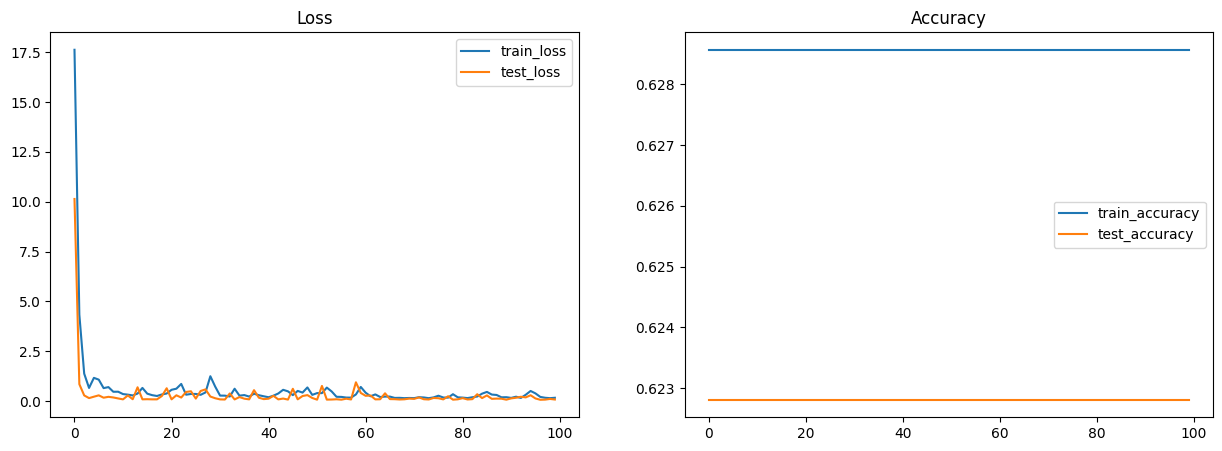

In [ ]:
from IPython.display import clear_output
# putting everything together in a training loop
batch_size = 32
epochs = 100

metrics_history = {
    "train_loss": [],
    "train_accuracy": [],
    "test_loss": [],
    "test_accuracy": []
}

train_ds = train_dataset.shuffle(1000).batch(batch_size)
test_ds = test_dataset.batch(batch_size)

# batch = next(train_ds.as_numpy_iterator())
# batch = train_ds.take(batch_size)

for i in range(epochs):
  for step, batch in enumerate(train_ds.as_numpy_iterator()):
    # call train step here


  for metric, value in metrics.compute().items():
    metrics_history[f"train_{metric}"].append(value)
  metrics = metrics.empty()

  for step, batch in enumerate(test_ds.as_numpy_iterator()):
    # call eval step here

  for metric, value in metrics.compute().items():
    metrics_history[f"test_{metric}"].append(value)

  clear_output(wait=True)
  # Plot loss and accuracy in subplots
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
  ax1.set_title('Loss')
  ax2.set_title('Accuracy')
  for dataset in ('train', 'test'):
    ax1.plot(metrics_history[f'{dataset}_loss'], label=f'{dataset}_loss')
    ax2.plot(metrics_history[f'{dataset}_accuracy'], label=f'{dataset}_accuracy')
  ax1.legend()
  ax2.legend()
  plt.show()

Question: What do you expect would happen if we train with a very tiny data e.g one batch of our dataset.

<details>
<summary>✅ Answer</summary>
The model will likely overfit.

With so little data, the model can easily memorize the few examples it sees. This means it may perform well (even perfectly) on the training batch but poorly on unseen data. You'll often see low training loss and very low accuracy on the test set.

On the positive side, training on one batch is a great debugging trick:
It helps check that your model can at least memorize the training data.
If it can't fit even a single batch, something is likely wrong with your setup (loss function, optimizer, data shape, etc.).
</details>

<details>
<summary>🔓Solution</summary>

```python
for i in range(epochs):
  for step, batch in enumerate(train_ds.as_numpy_iterator()):
  # for i in range(50):
    train_step(params, model, optimizer, metrics, batch)

  for metric, value in metrics.compute().items():
    metrics_history[f"train_{metric}"].append(value)
  metrics.reset()

  for step, batch in enumerate(test_ds.as_numpy_iterator()):
    eval_step(params, model, metrics, batch)

  for metric, value in metrics.compute().items():
    metrics_history[f"test_{metric}"].append(value)
  metrics.reset()

```
</details>

Question: What does it mean if our model has an accuracy of 50%?

<details>
<summary>✅ Answer</summary>
Your model is guessing randomly
In a binary classification task (e.g., predicting 0 or 1), 50% accuracy often indicates the model is no better than random chance like flipping a coin. This is especially true if the dataset is balanced, meaning there are roughly equal numbers of class 0 and class 1 examples.
</details>

Play around with the hyperparameters of the model and see if you can improve the accuracy of the model.

There are other techniques we can use to improve model accuracy other than varying the hyperparams. We'll look at this in a later section.

### Evaluation Metrics

When we build a machine learning model, especially for classification tasks, we need to know how well it's performing. A single "accuracy" number often isn't enough, especially when one class is much rarer than another (this is called "class imbalance"). That's where the Confusion Matrix comes in.

**The Confusion Matrix: What It Is**

The Confusion Matrix is a table used to describe the performance of a classification model on a set of test data where the true outcomes are known. It helps us visualize how well our model is doing.

Let's define its components for a binary classification problem (e.g., predicting "Positive" or "Negative"):

|                   | Predicted Positive   | Predicted Negative   |
|-------------------|----------------------|----------------------|
| **Actual Positive** | True Positives (TP)  | False Negatives (FN) |
| **Actual Negative** | False Positives (FP) | True Negatives (TN)  |


- True Positives (TP): The model correctly predicted the positive class. (e.g., predicted rain, and it actually rained).
- False Negatives (FN): The model incorrectly predicted the negative class when the actual class was positive. This is a "Type II error" or a "miss." (e.g., predicted no rain, but it actually rained).
- False Positives (FP): The model incorrectly predicted the positive class when the actual class was negative. This is a "Type I error" or a "false alarm." (e.g., predicted rain, but it didn't rain).
- True Negatives (TN): The model correctly predicted the negative class. (e.g., predicted no rain, and it didn't rain).


**Key Evaluation Metrics Derived from the Confusion Matrix**

These metrics provide a more nuanced understanding of model performance than just accuracy.

1. Accuracy

Meaning: Accuracy measures the proportion of the total predictions that were correct. It's the most intuitive metric, but can be misleading with imbalanced datasets.

Formula:

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$



- When to Use: Good for balanced datasets where false positives and false negatives are of roughly equal importance.

2. Precision (Positive Predictive Value)

Meaning: Precision measures, out of all the instances the model predicted as positive, how many actually were positive. It answers: "When our model says it's positive, how often is it right?"

Formula:


$$
\text{Precision} = \frac{TP}{TP + FP}
$$


- When to Use: Important when the cost of a False Positive (FP) is very high.
Example: Spam email detection. A false positive means a legitimate email is marked as spam (and might be missed). You want high precision here to minimize misclassifying important emails.

3. Recall (Sensitivity or True Positive Rate)

Meaning: Recall measures, out of all the instances that actually were positive, how many the model correctly identified. It answers: "Out of all actual positives, how many did our model 'recall' or find?"

Formula:

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

- When to Use: Important when the cost of a False Negative (FN) is very high.
Example: Disease detection. A false negative means a sick person is told they are healthy. You want high recall here to ensure as many sick people as possible are identified.


4. F1-Score

Meaning: The F1-Score is the harmonic mean of Precision and Recall. It provides a single score that balances both concerns. It's especially useful when you have an uneven class distribution.

Formula:

$$
\text{F1-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$


Why Not Just Accuracy?
Consider a dataset where 95% of emails are "Not Spam" (Negative) and only 5% are "Spam" (Positive). A naive model that always predicts "Not Spam" would achieve 95% accuracy. However, its Recall for "Spam" would be 0% (it misses all spam!), which is terrible if you actually want to catch spam.

In such cases, metrics like Precision, Recall, and F1-Score provide a much more honest and useful evaluation of your model's performance on the minority class, or when specific types of errors are more costly.


## Multiclass Classifier


Sometimes we actually need to make predictions beyond 2 classes. Ask for examples.

Let's first describe our new task. In this task our input is an image of a digit one of (0 - 9) and we need to predict the digit in the image. This means we have 10 classes cause our image can euther be 0 or 1 or 2 or ... or 9

Let's think about what we need to modify in our binary classifier to make it a multiclass classifier.

1. I think one of the most obvious thing we need to change is the last layer of our network. The output of this layer has a dimension equal to the output of the number of classes we are a making a prediction over. Since we have 10 classes to predict our output layer should have a dimension of 10.

2. Also remember that the output of the network is a probability distribution over the classes and in a probability distribution the sum of probabilities should be 1. Although the sigmoid function takes a value and gives us a value between 0 and 1 which is characteristic of a probability, in a multiclass setting if we take the sigmoid function over the output of the network the numbers won't add up to 1. We also want to maintain that higher scores should have higher probabilities.
We can do something like dividing each score by the sum of scores. This would work but we might end up running into some problems. can you think of some?

- zero division error
Is there a way to avoid negative numbers.

Quiz: which of these functions would turn every number into a positive number?

instead of using the scores directly, we can use the exponential value of the scores. This is known as the softmax function and it is defined as ...

3. Since we are still dealing with probabilities our cross entropy loss  which we discussed in the previous section still works. We just need to adjust it slightly. Since our model outputs a probability for each class, we no longer need the second part of our previous equation. For each sample we only need to add the probabilities for each class by their true value.

In the cells below, we will define a new network to take in the images and output the probability for each digit. Then train the model.

We'll use TensorFlow Datasets (TFDS) to load the MNIST data and convert it to NumPy arrays.

Each image is 28x28, and we'll flatten it to a 784-dimensional vector for our MLP.

Labels are integers from 0 to 9.

In [ ]:
train_steps = 1200
eval_every = 200
batch_size = 32

train_ds: tf.data.Dataset = tfds.load('mnist', split='train')
test_ds: tf.data.Dataset = tfds.load('mnist', split='test')

train_ds = train_ds.map(
  lambda sample: {
    'image': tf.cast(sample['image'], tf.float32) / 255,
    'label': sample['label'],
  }
)  # normalize train set
test_ds = test_ds.map(
  lambda sample: {
    'image': tf.cast(sample['image'], tf.float32) / 255,
    'label': sample['label'],
  }
)  # Normalize the test set.

# Create a shuffled dataset by allocating a buffer size of 1024 to randomly draw elements from.
train_ds = train_ds.repeat().shuffle(1024)
# Group into batches of `batch_size` and skip incomplete batches, prefetch the next sample to improve latency.
train_ds = train_ds.batch(batch_size, drop_remainder=True).take(train_steps).prefetch(1)
# Group into batches of `batch_size` and skip incomplete batches, prefetch the next sample to improve latency.
test_ds = test_ds.batch(batch_size, drop_remainder=True).prefetch(1)

For multiclass problems like MNIST, where labels range from 0 to 9, we need our network to output a **vector of class scores** instead of a single probability.

Changes:
- Replace the final output layer to output 10 units (one per class)
- **Do NOT** apply softmax in the model itself — the loss function handles it.

Code Task: Update the `MLP` to output raw logits of shape `(batch_size, 10)`

In [ ]:
class MLP(nnx.Module):
  def __init__(self, *, rngs: nnx.Rngs):
    self.linear1 = nnx.Linear(64, 128, rngs=rngs)
    self.linear2 = nnx.Linear(128, 30, rngs=rngs)
    self.linear3 = nnx.Linear(30, 10, rngs=rngs)
    self.gelu = nnx.gelu

  def __call__(self, x: jax.Array):
    x = self.linear1(x)
    x = self.gelu(x)
    x = self.linear2(x)
    x = self.gelu(x)
    x = self.linear3(x)
    return x

model = MLP(rngs=nnx.Rngs(0))

# visualize the model
nnx.display(model)

In multiclass classification, we use **softmax cross-entropy loss**. This computes the probability of each class and penalizes wrong predictions.

We'll use `optax.softmax_cross_entropy_with_integer_labels` which expects:
- Logits of shape `(batch_size, num_classes)`
- Integer labels (not one-hot) of shape `(batch_size,)`


🧠 Quiz

**Q:** Why don't we apply softmax inside the model?

**A:** Because the loss function (`softmax_cross_entropy`) expects raw logits and applies softmax internally for numerical stability.


<details>
<summary>🔓 Solution</summary>
def loss_fn(model, batch):
  x, y = batch
  logits = model(x)
  loss = optax.softmax_cross_entropy_with_integer_labels(logits, y).mean()
  return loss, logits
</details>

Let’s now put everything together and train the MLP for 10 epochs using AdamW optimizer.

In [ ]:
train()

## Appendix


#### References
1. https://flax.readthedocs.io/en/latest/nnx_basics.html
2. https://bjlkeng.io/posts/probabilistic-interpretation-of-regularization/


Suggest stuff that they can try on their own

Read up